In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/val.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse1.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse2.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse3.png  
  inflating: val/Holo/psp08_04_01_mosaic_197_origins_holo_offse4.png  
  inflating: val/Holo/psp08_04_01_mosaic_208_origins_holo_offse2.png  
  inflating: val/Holo/psp08_04_01_mosaic_208_origins_holo_offse3.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse1.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse2.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse3.png  
  inflating: val/Holo/psp08_04_01_mosaic_209_origins_holo_offse4.png  
  inflating: val/Holo/psp08_04_01_mosaic_211_origins_holo_offse1.png  
  inflating: 

In [ ]:
import os
import zipfile

# Chemin du dossier contenant les fichiers ZIP
folder_path = '/content/drive/MyDrive/dataset/inference'

# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.zip'):
        file_path = os.path.join(folder_path, filename)
        print(f'Décompression de {file_path}...')

        # Créer un dossier pour extraire les fichiers
        extract_folder = os.path.join(folder_path, filename[:-4])  # Supprime l'extension .zip
        os.makedirs(extract_folder, exist_ok=True)

        # Décompresser le fichier ZIP
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)

print('Décompression terminée.')


Décompression de /content/drive/MyDrive/dataset/inference/origins.zip...
Décompression de /content/drive/MyDrive/dataset/inference/copy_without_holo.zip...
Décompression terminée.


10/10 ━━━━━━━━━━━━━━━━━━━━ 188s 18s/step
psp10_04_01_mosaic_0_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_100_pseudo_holo_copy_inference.png: No Holo (True Negative)
psp10_04_01_mosaic_101_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_102_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_103_pseudo_holo_copy_inference.png: No Holo (True Negative)
psp10_04_01_mosaic_104_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_105_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_106_pseudo_holo_copy_inference.png: No Holo (True Negative)
psp10_04_01_mosaic_107_pseudo_holo_copy_inference.png: No Holo (True Negative)
psp10_04_01_mosaic_108_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_109_pseudo_holo_copy_inference.png: No Holo (False Positive)
psp10_04_01_mosaic_10_pseudo_holo_copy_inference.png: No Holo (True Negative)
psp10_0

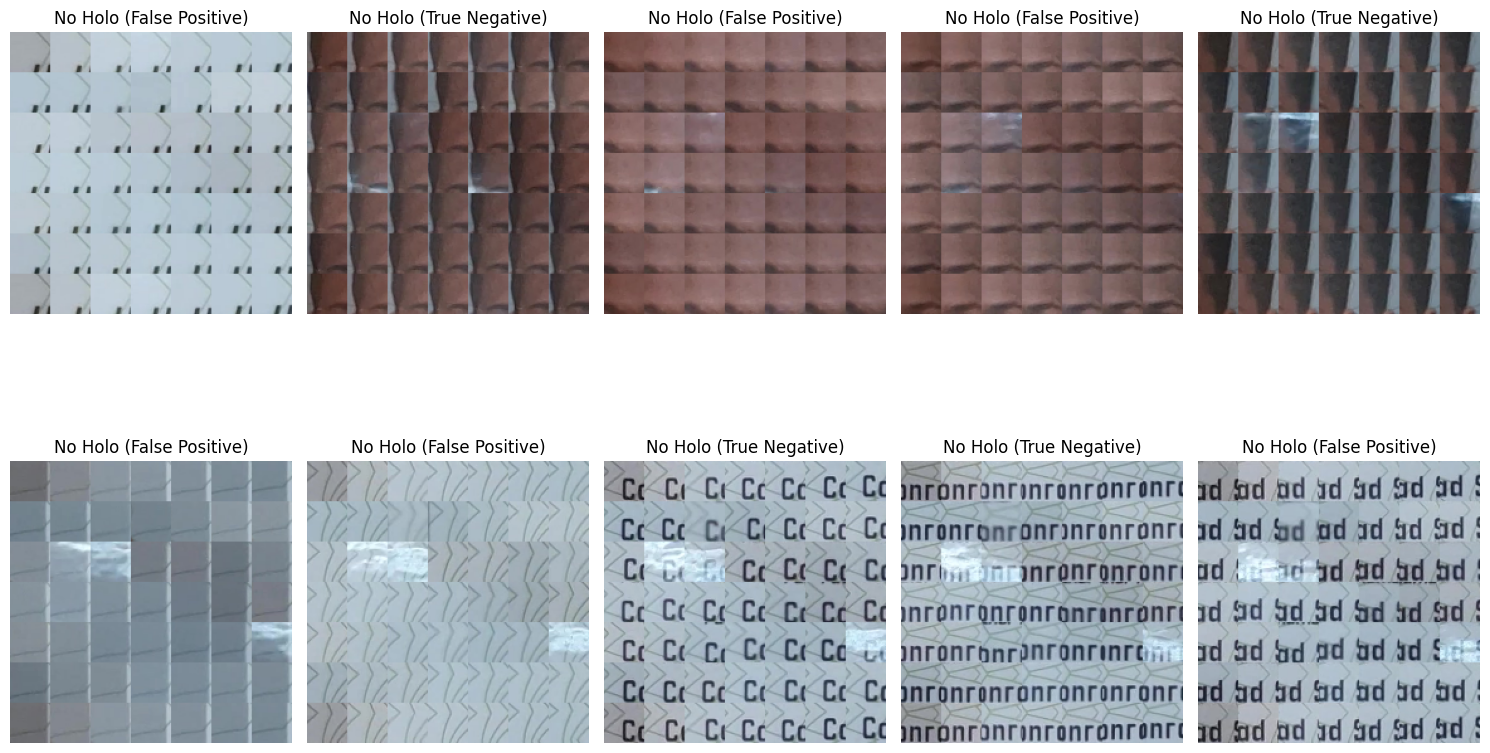

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define your index list for Holo
liste_indices_Holo = [17, 36, 37, 38, 39, 55, 56, 57, 58, 59, 75, 76, 77, 79, 96, 98, 99,
                      112, 114, 116, 118, 119, 124, 131, 132, 133, 134, 135, 136,
                      139, 142, 143, 144, 145, 146, 151, 152, 154, 155, 156, 157,
                      162, 163, 164, 165, 166, 172, 175, 176, 177, 178, 182, 183,
                      184, 185, 186, 192, 196, 197, 198, 203, 204, 205, 206, 208,
                      209, 210, 211, 212, 216, 217, 224, 225, 227, 228, 229, 230,
                      231, 244, 245, 246, 247, 248, 249, 260, 261, 264, 265, 267,
                      268, 280, 281, 282, 283, 284, 285]

# Load your model
model = tf.keras.models.load_model('/content/modeleV2_better.keras')

# Directory containing your images
image_folder = '/content/drive/MyDrive/inference/pseudo_holo_copy/pseudo_holo_copy/psp10_04_01'

# List of images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Define image parameters
img_height, img_width = 224, 224  # Update this to the input size your model expects
num_predictions = min(300, len(image_files))  # Limit to 300 images

# Prepare an array to hold the images for prediction
test_images = np.zeros((num_predictions, img_height, img_width, 3))

# Load and preprocess images
for i, file in enumerate(image_files[:num_predictions]):
    img_path = os.path.join(image_folder, file)
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Normalize the image to [0, 1]
    test_images[i] = img_array

# Make predictions for the batch
predictions = model.predict(test_images)
#print(predictions)

# Convert predictions to binary labels (0 for Holo, 1 for No_Holo)
#predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)
predicted_labels = np.round(predictions).astype(int)

# Initialize a list to hold results
results = []
TP=0
TN=0
FP=0
FN=0
# Evaluate the predictions
for idx, label in enumerate(predicted_labels):
    if idx in liste_indices_Holo and label == 0:
        results.append((image_files[idx], 'Holo (True Positive)')) # holo classifié holo
        TP+=1
    elif idx not in liste_indices_Holo and label == 1:
        results.append((image_files[idx], 'No Holo (True Negative)')) # no holo classifié no holo
        TN+=1
    elif idx in liste_indices_Holo and label == 1:
        results.append((image_files[idx], 'Holo (False Negative)')) # holo classifié no holo
        FN+=1
    else:
        results.append((image_files[idx], 'No Holo (False Positive)')) # no holo classifié holo
        FP+=1

# Print results
for image_name, outcome in results:
    print(f'{image_name}: {outcome}')

print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

# Optional: Visualize some of the predictions
plt.figure(figsize=(15, 10))
for i in range(min(10, len(results))):  # Show up to 10 results
    img_path = os.path.join(image_folder, results[i][0])
    img = load_img(img_path, target_size=(img_height, img_width))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(results[i][1])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Compter le nombre de Holo et No_Holo
# count_holo = results.count(0)
# count_no_holo = results.count(1)

nb_holo = TP + FP
nb_no_holo = TN + FN

# Affichage des résultats
print(f'Nombre de Holo : {nb_holo}')
print(f'Nombre de No_Holo : {nb_no_holo}')

Nombre de Holo : 193
Nombre de No_Holo : 107


In [ ]:
print(len(liste_indices_Holo))

96


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Chemin du dossier contenant les fichiers ZIP
folder_path = '/content/drive/MyDrive/dataset/inference'

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Charger votre modèle
model = tf.keras.models.load_model('modele.keras')

# Répertoire contenant les images à prédire
images_dir = os.path.join(folder_path, 'origins/origins/psp10_01_01')

# Charger et prétraiter les images
image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
#image_paths = sorted(image_paths)  # Pour s'assurer que les images sont triées par nom

# Initialiser les compteurs pour Holo et No_Holo
holo_count = 0
no_holo_count = 0

# Faire des prédictions pour chaque image
for img_path in image_paths:
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = 'No_Holo' if prediction > 0.5 else 'Holo'

    # Mettre à jour les compteurs
    if predicted_class == 'Holo':
        holo_count += 1
    else:
        no_holo_count += 1

# Afficher les résultats
print(f'Nombre total d\'images classées Holo: {holo_count}')
print(f'Nombre total d\'images classées No_Holo: {no_holo_count}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


KeyboardInterrupt: 

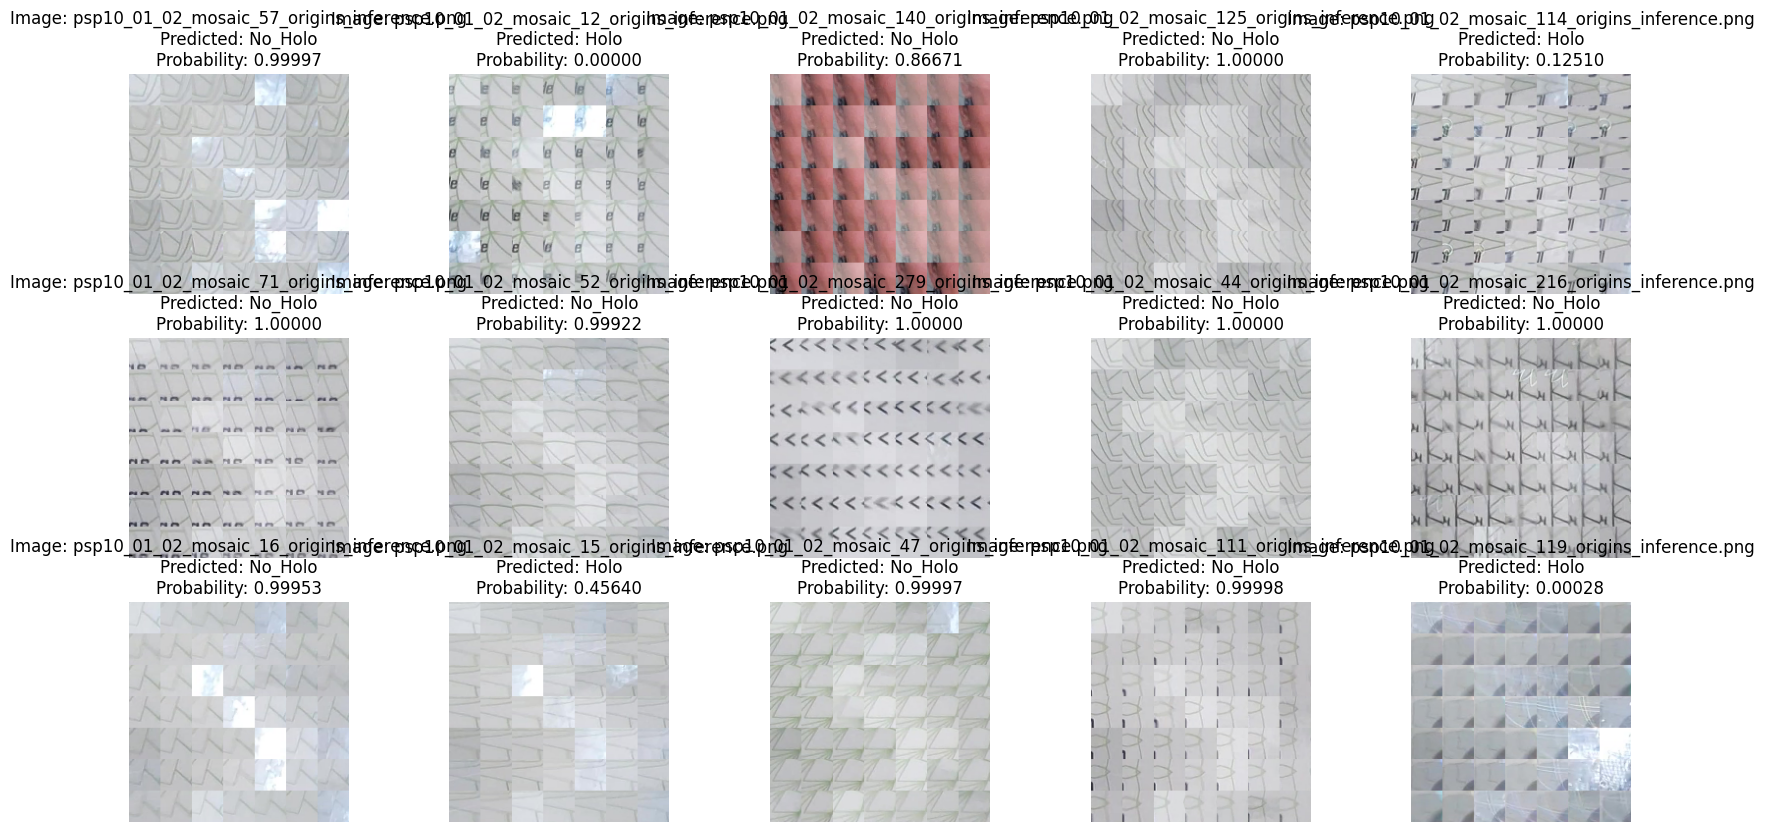

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

# Sélectionner aléatoirement 30 images parmi toutes les images
random.seed(42)  # Pour la reproductibilité
random_indices = random.sample(range(len(image_paths)), 30)

# Afficher les images aléatoires sélectionnées
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    img_path = image_paths[idx]
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = 'No_Holo' if prediction > 0.5 else 'Holo'
    prob_value = prediction[0][0]
    img_name = os.path.basename(img_path)

    ax = plt.subplot(6, 5, i + 1)  # Grille de 6x5 pour afficher 30 images
    plt.imshow(img.squeeze())  # Enlever la dimension du batch
    plt.title(f'Image: {img_name}\nPredicted: {predicted_class}\nProbability: {prob_value:.5f}')
    plt.axis('off')

plt.show()

print('Affichage des images aléatoires terminé.')


#calcul seuil

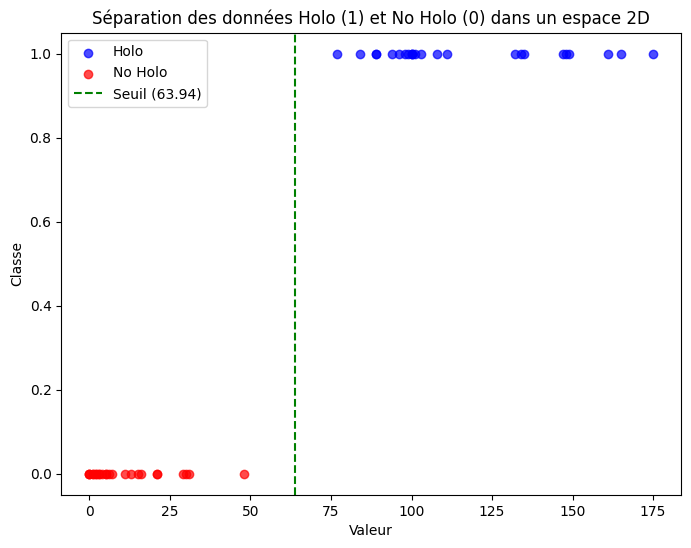

Moyenne de Holo : 116.46
Moyenne de No Holo : 11.42
Moyenne combinée des deux : 63.94


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Données
Holo = np.array([165, 99, 94, 100, 77, 175, 89, 108, 132, 148, 103, 111, 84, 100, 135, 147, 98, 161, 89, 101, 100, 149, 96, 134])
No_Holo = np.array([6, 31, 48, 3, 11, 29, 5, 16, 0, 13, 5, 30, 2, 4, 3, 0, 15, 1, 21, 0, 7, 21, 2, 1])

# Calculer la moyenne de Holo et de No_Holo
mean_Holo = np.mean(Holo)
mean_No_Holo = np.mean(No_Holo)

# Moyenne des deux ensembles
mean_combined = (mean_Holo + mean_No_Holo) / 2

# Affichage des points dans un espace 2D
plt.figure(figsize=(8, 6))
plt.scatter(Holo, np.ones_like(Holo), label='Holo', color='blue', alpha=0.7)  # Holo avec y=1
plt.scatter(No_Holo, np.zeros_like(No_Holo), label='No Holo', color='red', alpha=0.7)  # No_Holo avec y=0

# Affichage du seuil (moyenne combinée)
# plt.axvline(mean_Holo, color='blue', linestyle='dashed', label=f'Moyenne Holo ({mean_Holo:.2f})')
# plt.axvline(mean_No_Holo, color='red', linestyle='dashed', label=f'Moyenne No Holo ({mean_No_Holo:.2f})')
plt.axvline(mean_combined, color='green', linestyle='dashed', label=f'Seuil ({mean_combined:.2f})')

# Personnalisation du graphique
plt.xlabel('Valeur')
plt.ylabel('Classe')
plt.title('Séparation des données Holo (1) et No Holo (0) dans un espace 2D')
plt.legend()

# Affichage du graphique
plt.show()

# Affichage des résultats
print(f'Moyenne de Holo : {mean_Holo:.2f}')
print(f'Moyenne de No Holo : {mean_No_Holo:.2f}')
print(f'Moyenne combinée des deux : {mean_combined:.2f}')


#MobiletNetV2

## FULL LAYERS UNFREEZE

## Validation calcul seuil

## ORGINS

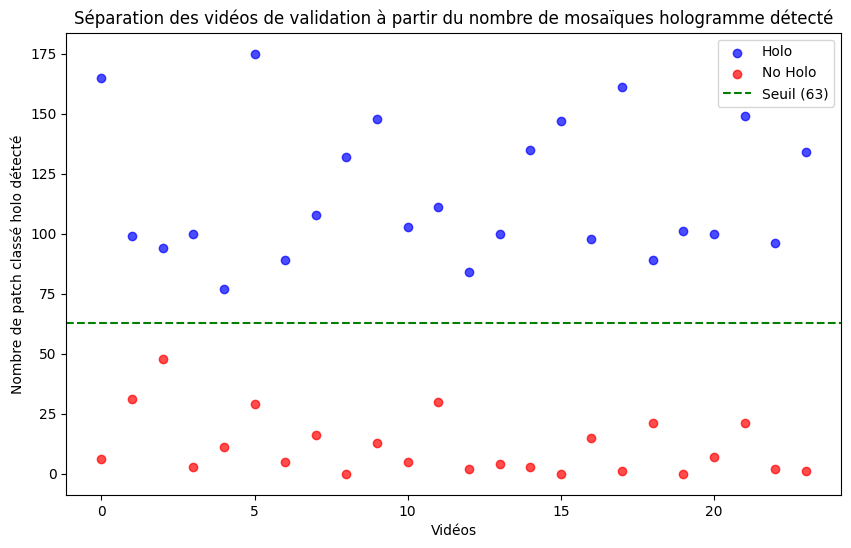

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Données
Holo = np.array([165, 99, 94, 100, 77, 175, 89, 108, 132, 148, 103, 111, 84, 100, 135, 147, 98, 161, 89, 101, 100, 149, 96, 134])
No_Holo = np.array([6, 31, 48, 3, 11, 29, 5, 16, 0, 13, 5, 30, 2, 4, 3, 0, 15, 1, 21, 0, 7, 21, 2, 1])


# Moyenne des deux ensembles
seuil = 63

# Créer des indices
indices_Holo = np.arange(len(Holo))
indices_No_Holo = np.arange(len(No_Holo))

# Affichage des points dans un espace 2D
plt.figure(figsize=(10, 6))
plt.scatter(indices_Holo, Holo, label='Holo', color='blue', alpha=0.7)  # Holo avec indices
plt.scatter(indices_No_Holo, No_Holo, label='No Holo', color='red', alpha=0.7)  # No_Holo avec indices

# Affichage du seuil (moyenne combinée)
plt.axhline(seuil, color='green', linestyle='dashed', label=f'Seuil ({seuil})')

# Personnalisation du graphique
plt.xlabel('Vidéos')
plt.ylabel('Nombre de patch classé holo détecté')
plt.title('Séparation des vidéos de validation à partir du nombre de mosaïques hologramme détecté')
plt.legend()

# Affichage du graphique
plt.show()



In [ ]:
!unzip /content/validation.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_206_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_207_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_208_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_209_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_20_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_210_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_211_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_212_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_213_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_214_origins_holo.png  
  inflating: validation/origins/psp10_05_03/psp10_05_03_mosaic_

In [1]:
!unzip /content/test.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_205_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_206_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_207_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_208_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_209_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_20_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_210_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_211_fraud_photo_replacement.png  
  inflating: test/photo_replacement/psp04_03_01/psp04_03_01_mosaic_212_fraud_photo_replacement.png  
  inflating: t

In [2]:
# Liste pour stocker les heatmaps
heatmaps_origins = []
heatmaps_copy_without_holo = []
heatmaps_photo_holo_copy = []
heatmaps_pseudo_holo_copy = []
all_nb_holo_origins = []
all_nb_holo_fraud = []

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/test/origins/'  # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour No_Holo, 0 pour Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_origins.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_origins.append((heatmap_data, nb_holo, nb_no_holo))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

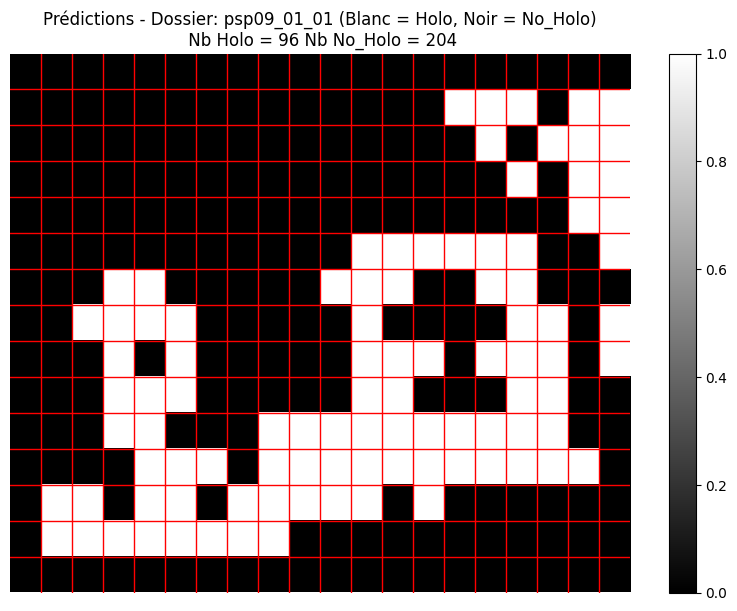

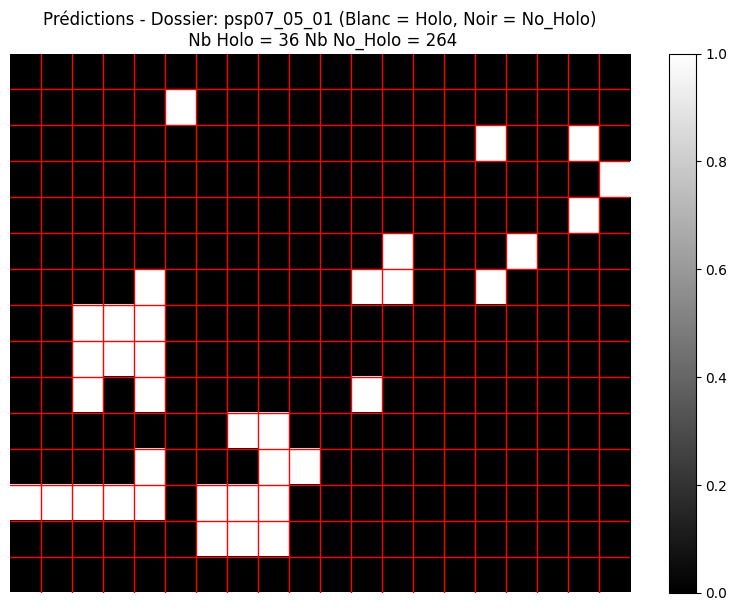

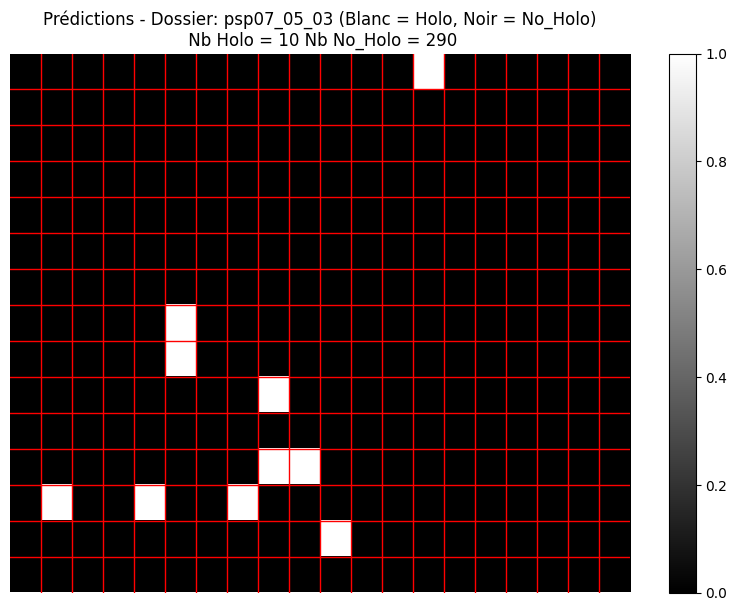

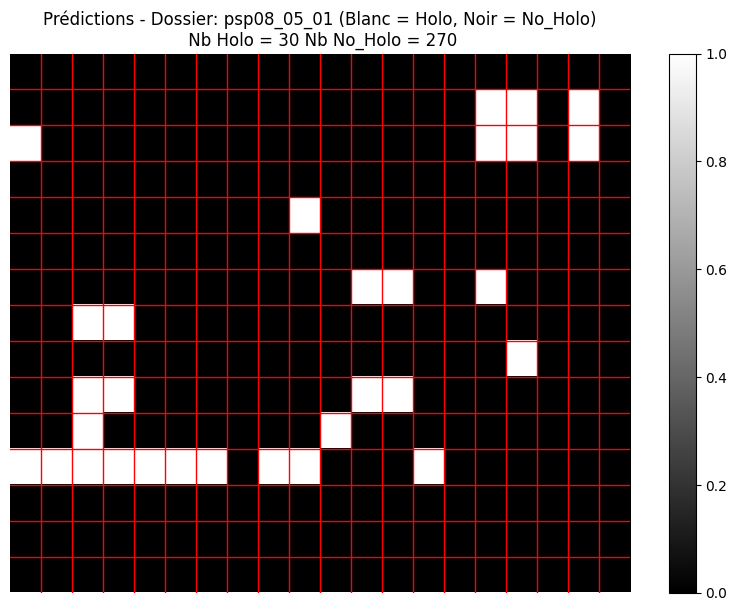

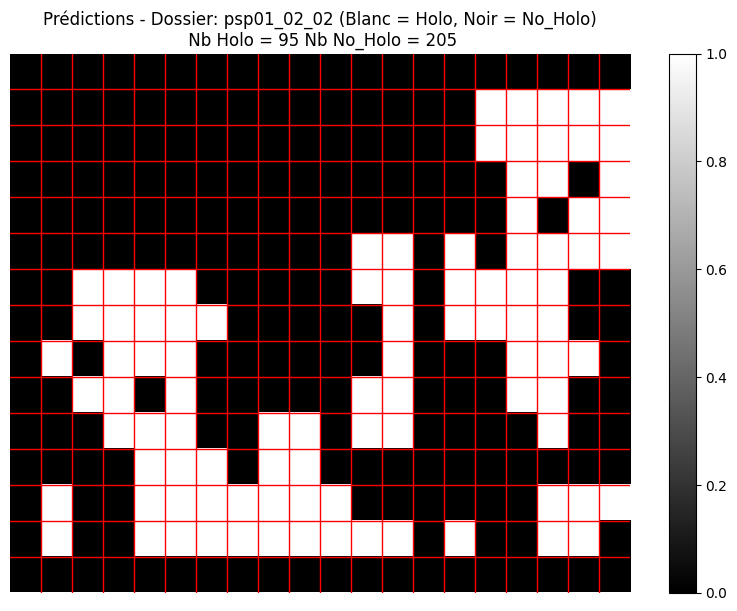

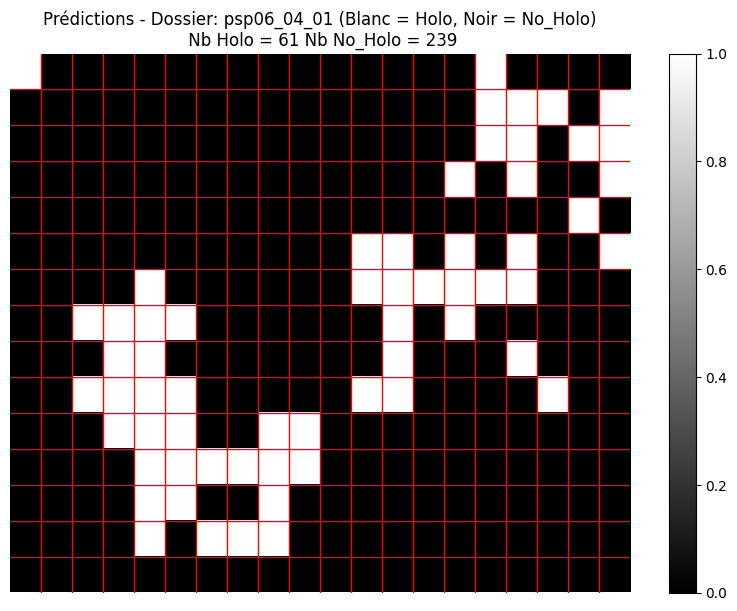

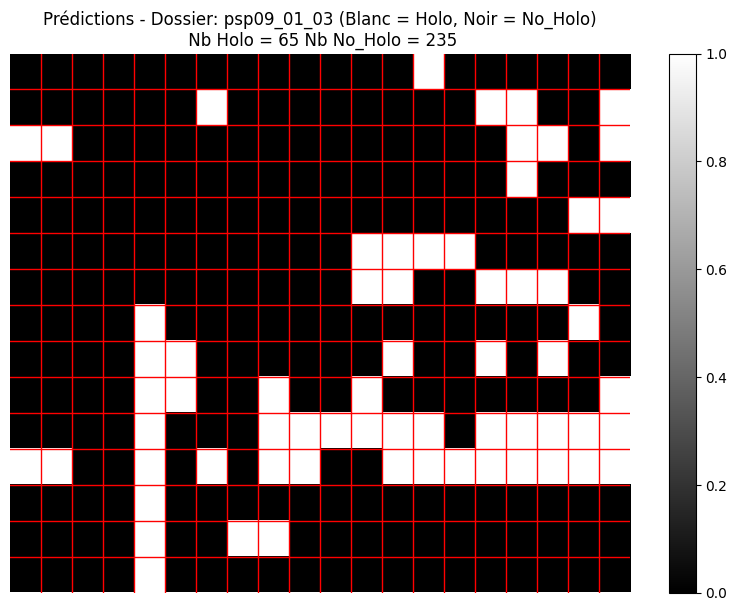

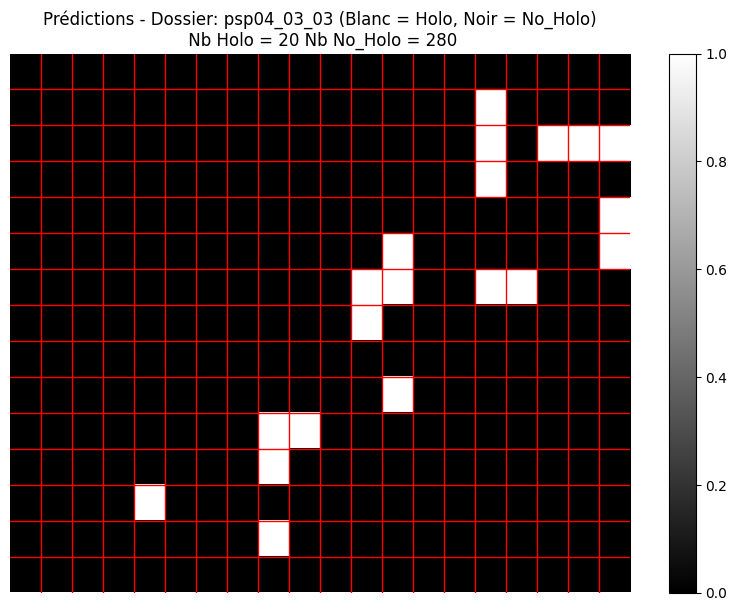

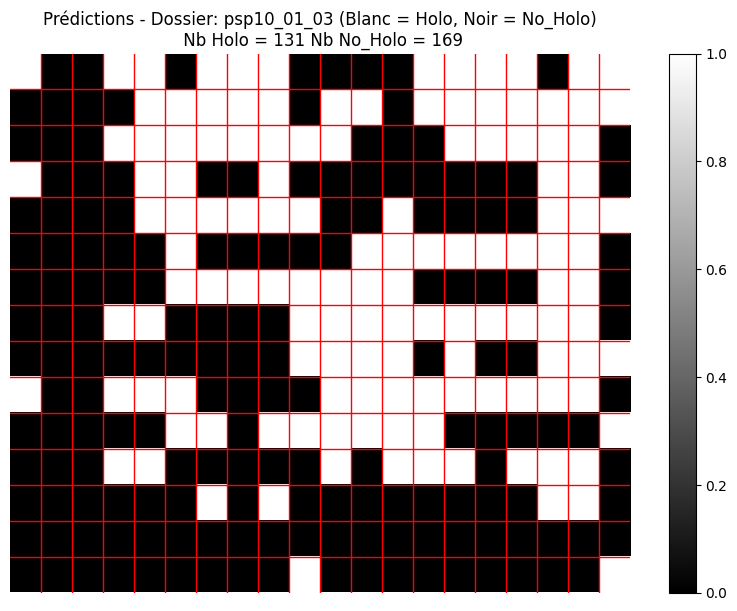

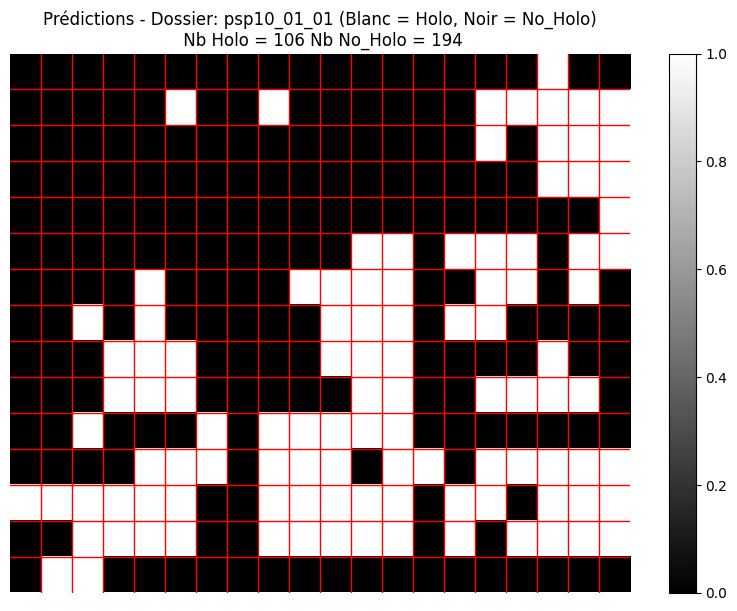

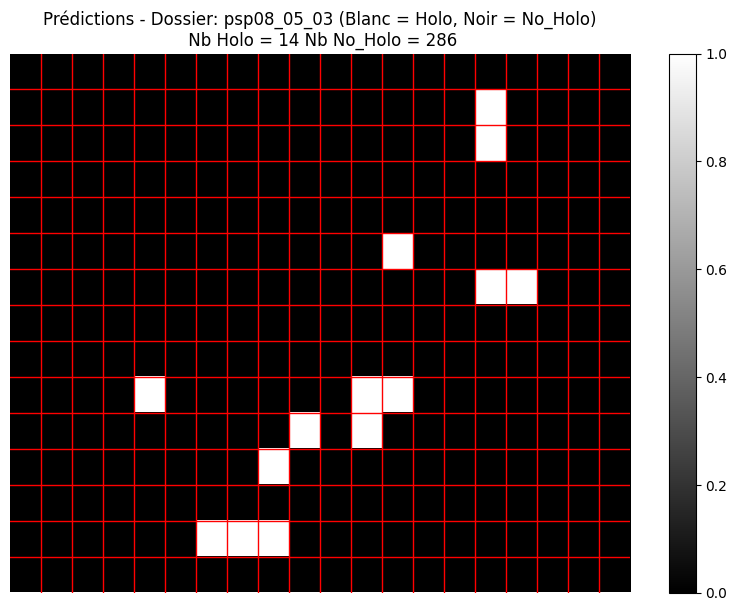

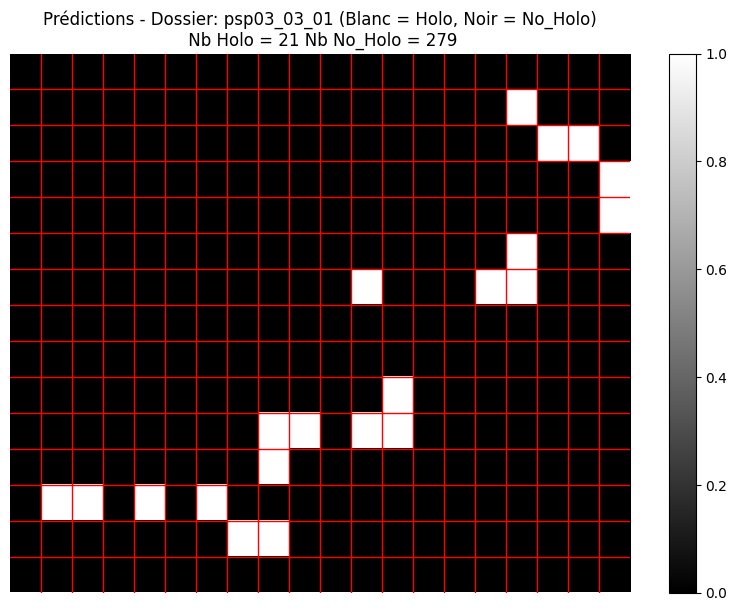

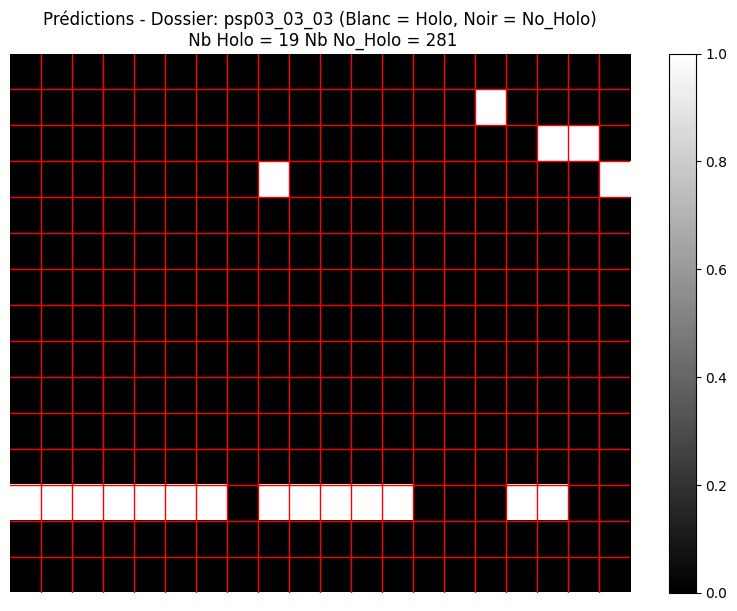

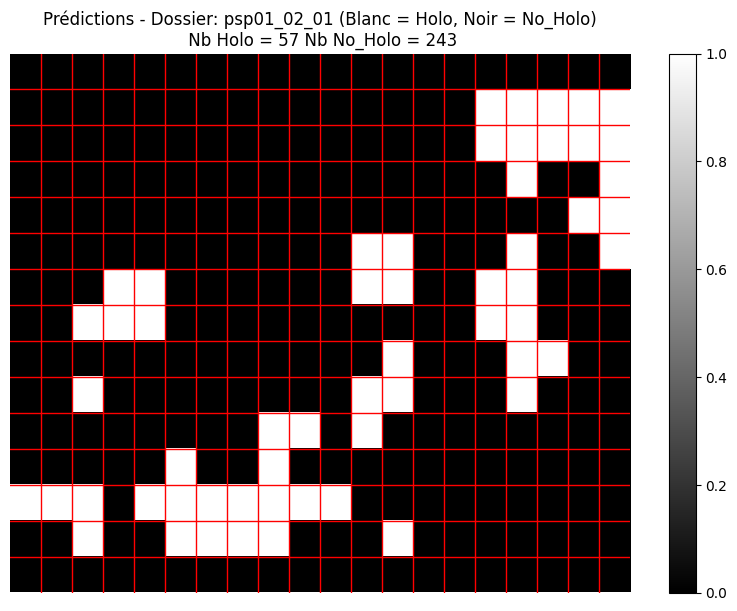

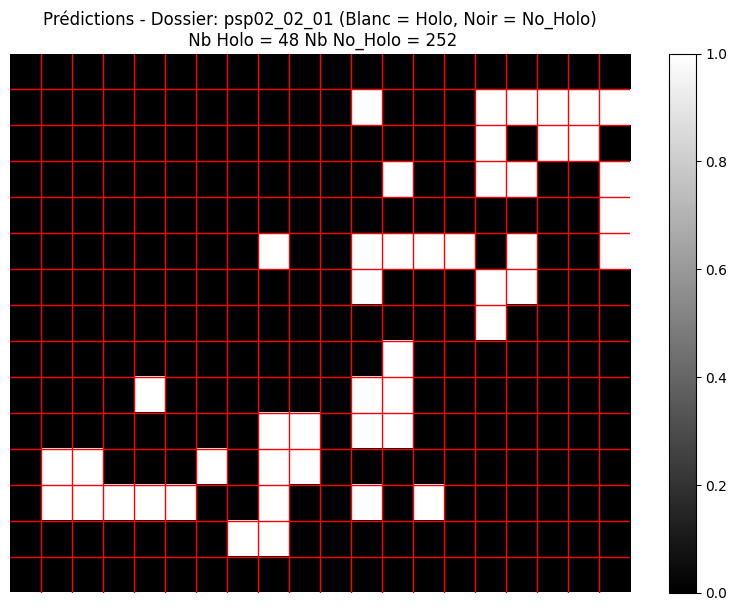

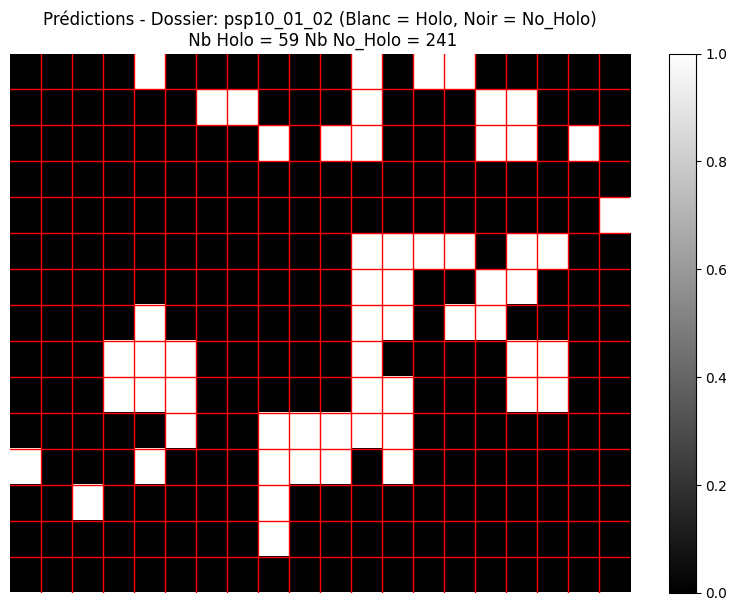

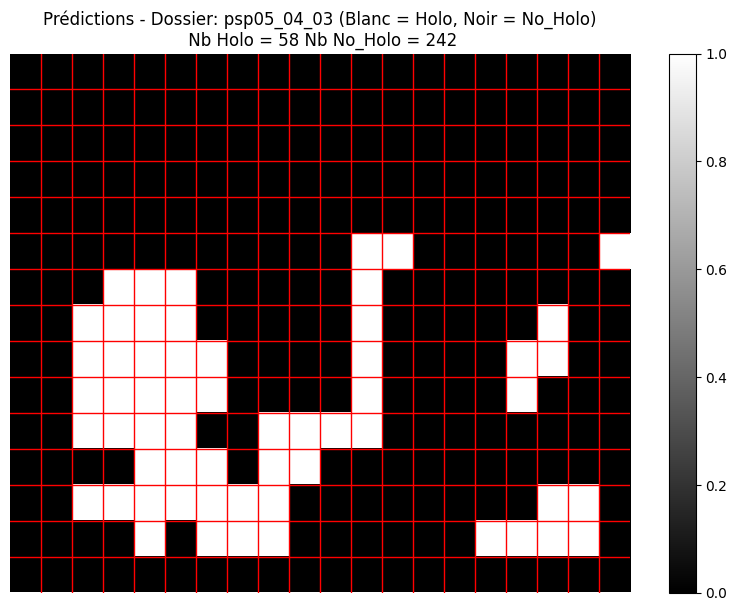

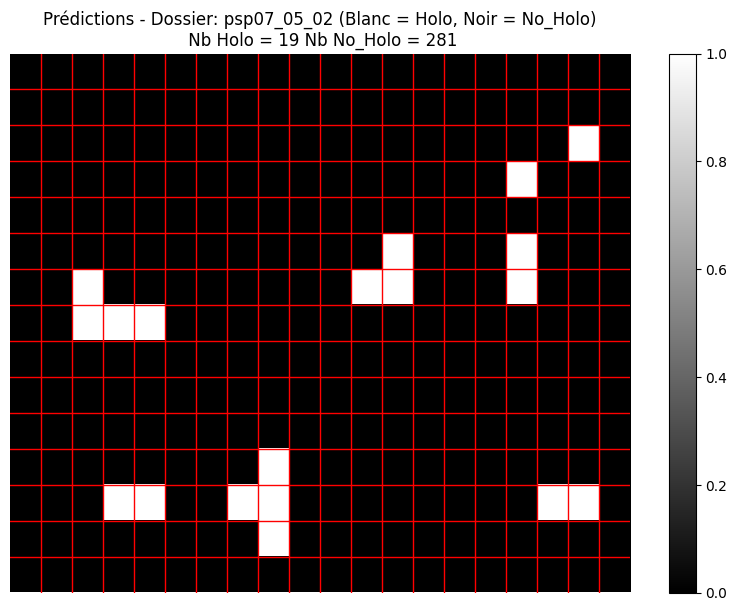

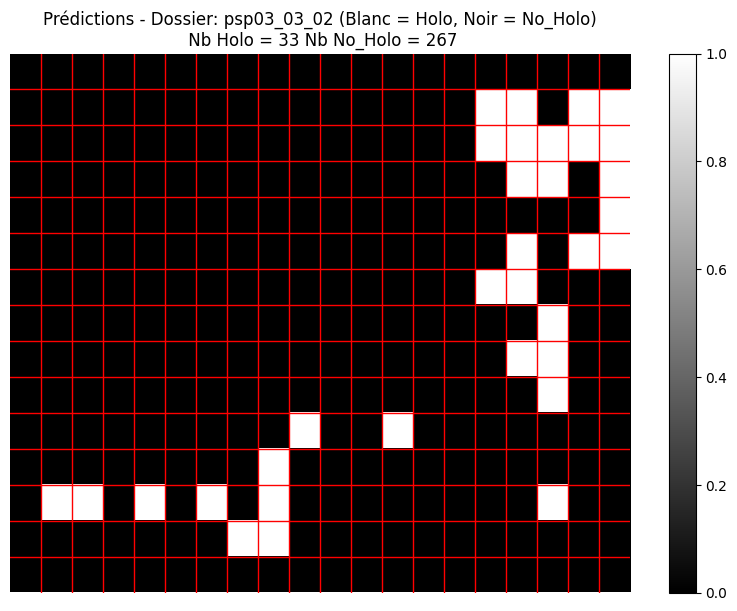

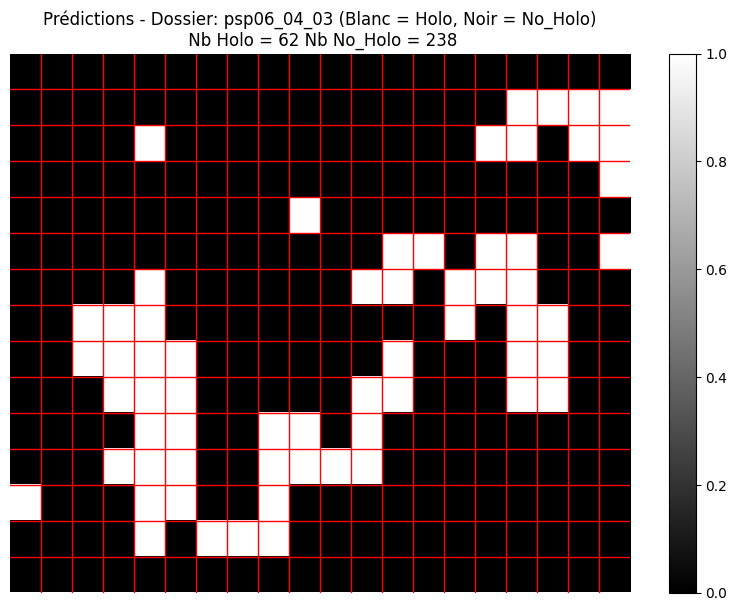

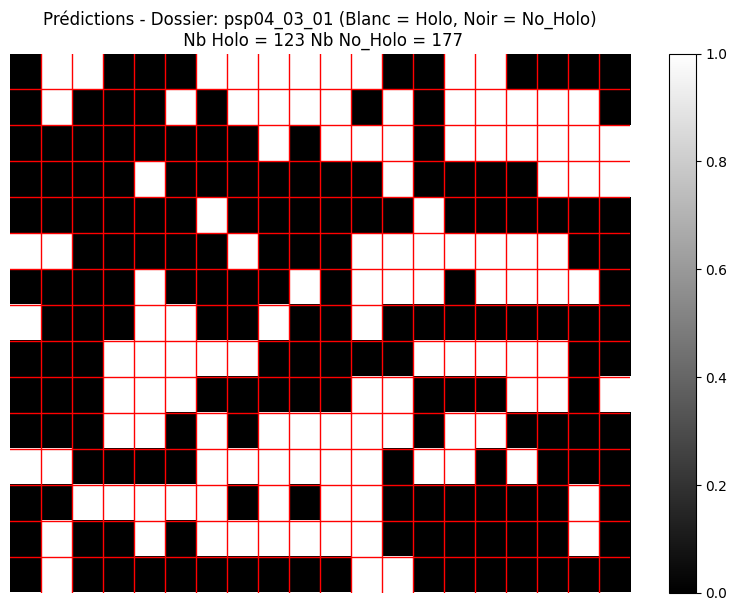

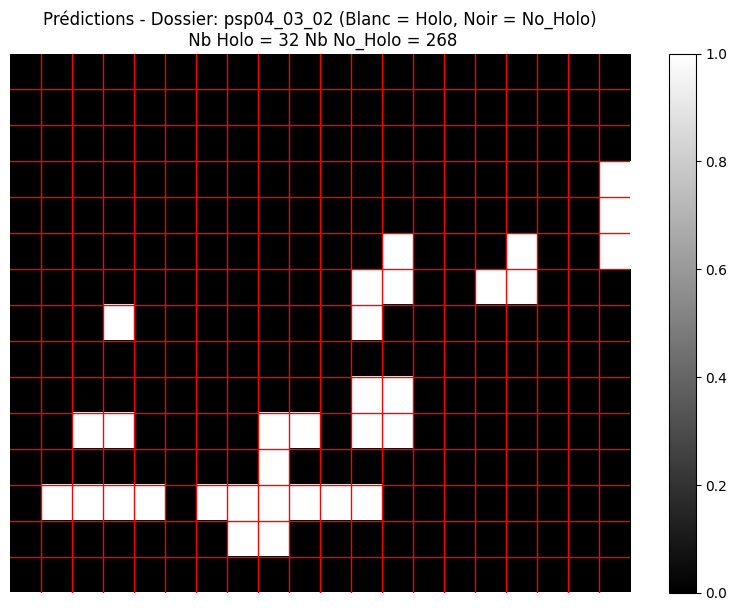

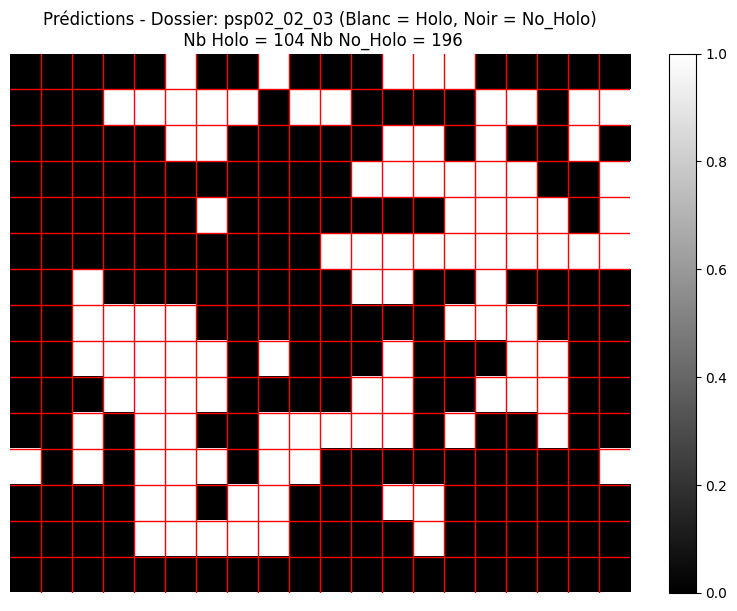

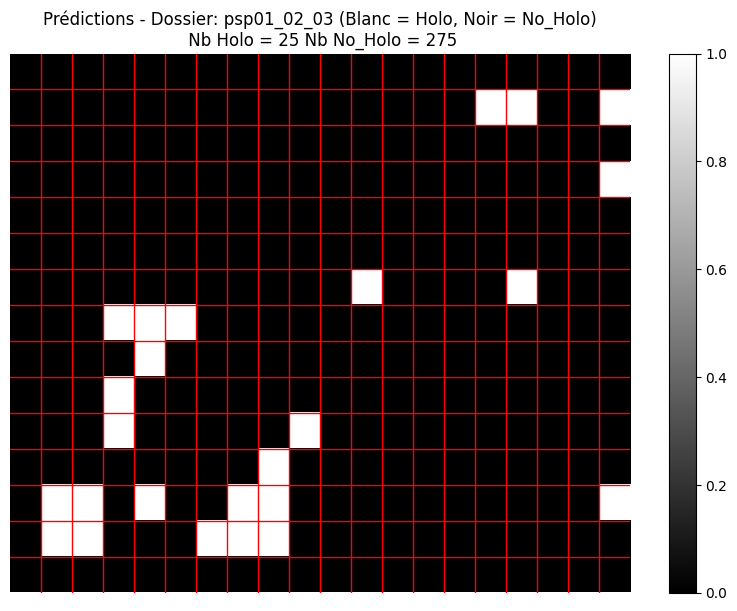

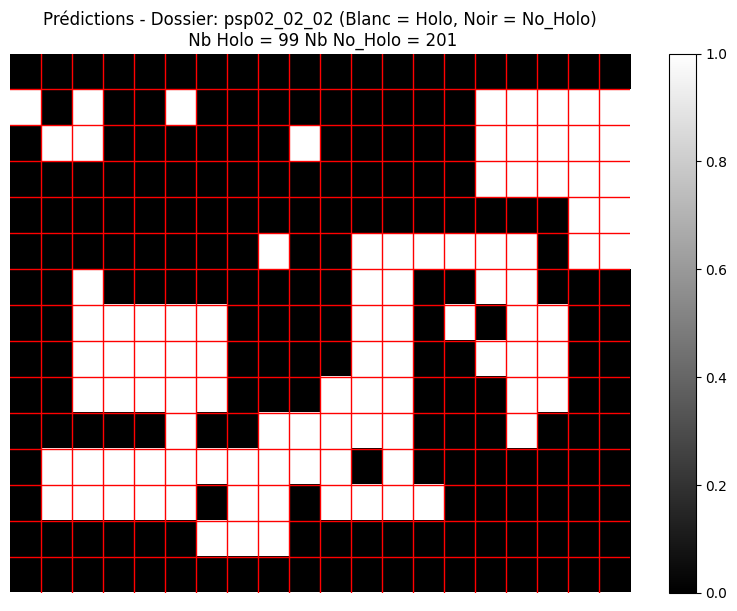

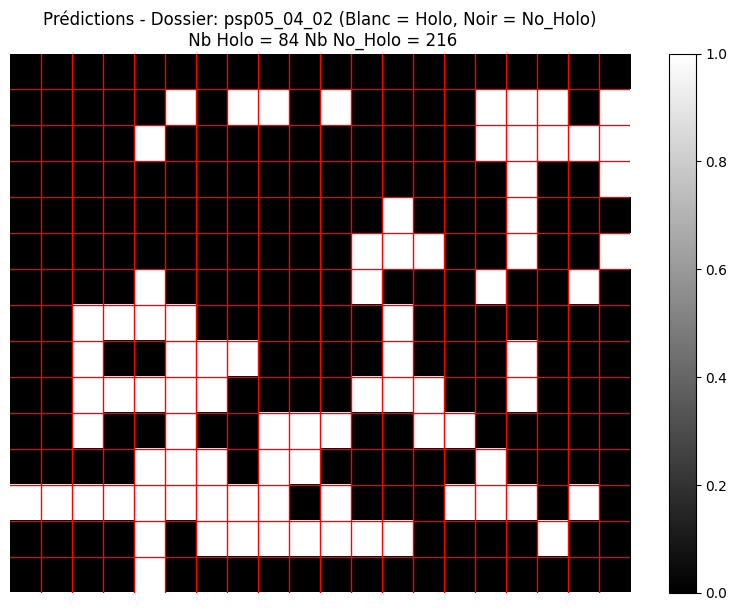

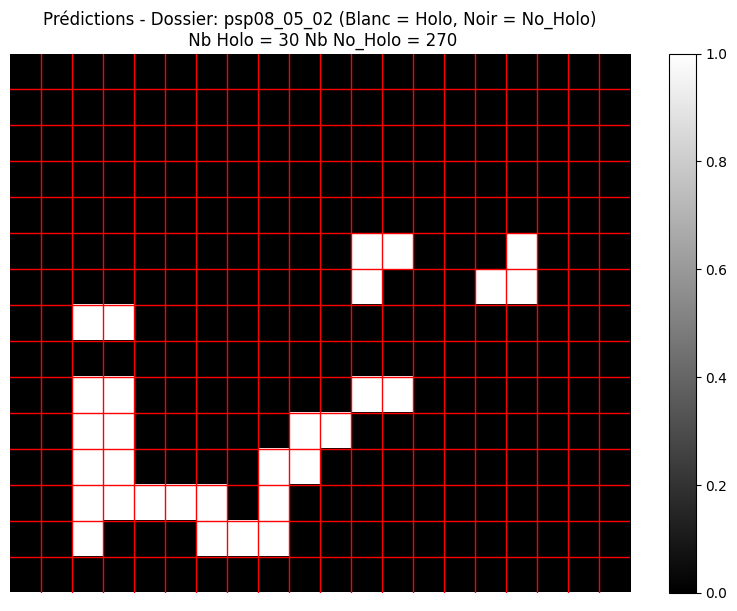

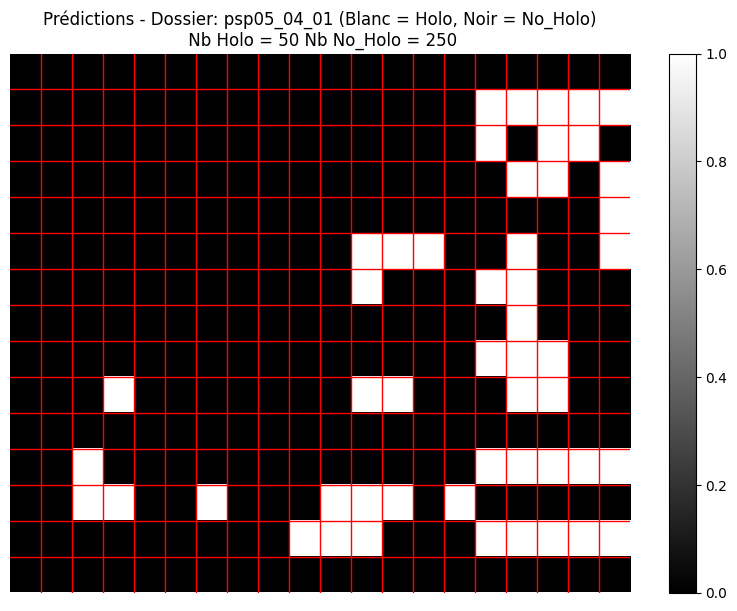

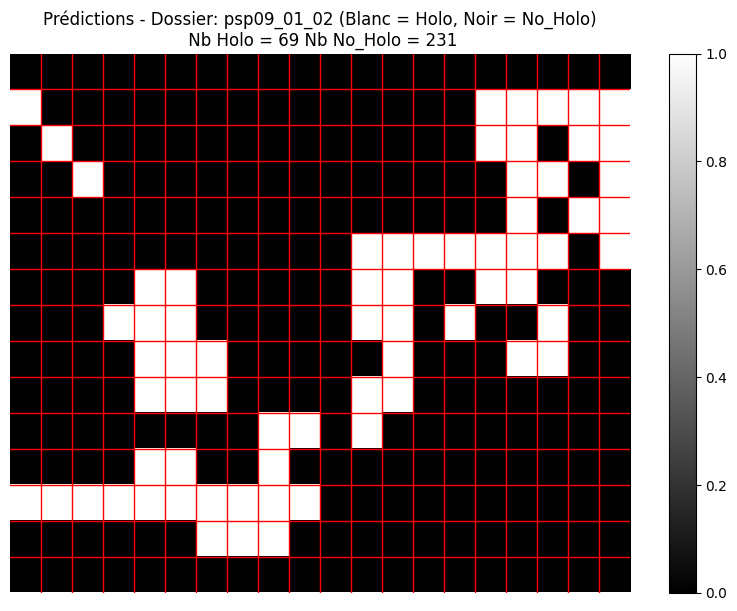

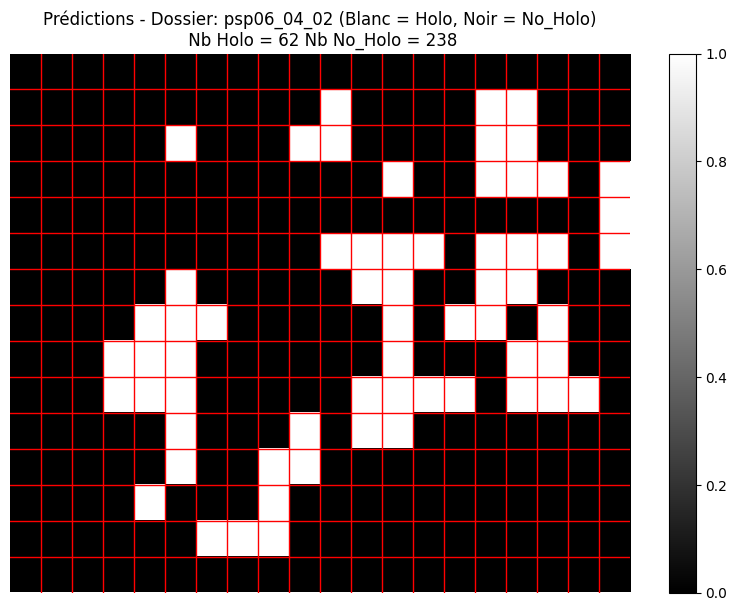

In [ ]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_origins):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [ ]:
print(all_nb_holo_origins)

[96, 36, 10, 30, 95, 61, 65, 20, 131, 106, 14, 21, 19, 57, 48, 59, 58, 19, 33, 62, 123, 32, 104, 25, 99, 84, 30, 50, 69, 62]


## FRAUD

## Copy Without Holo

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/test/copy_without_holo'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_copy_without_holo.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

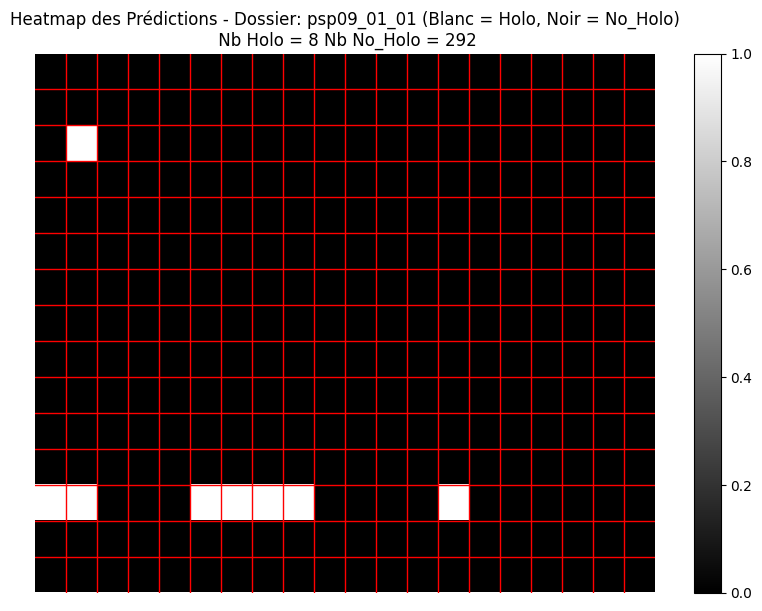

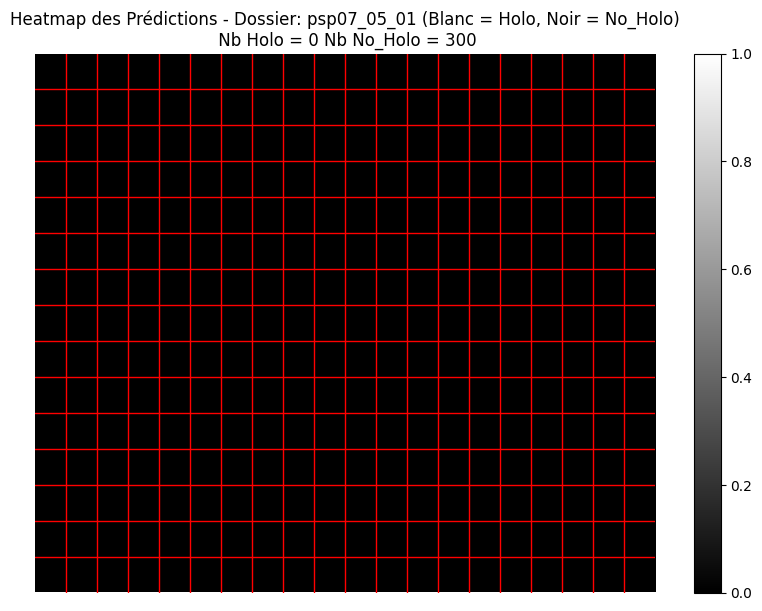

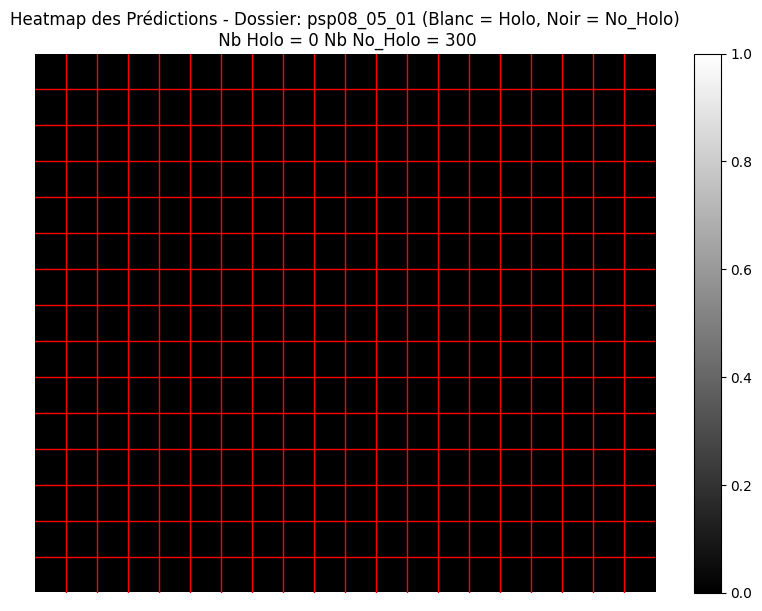

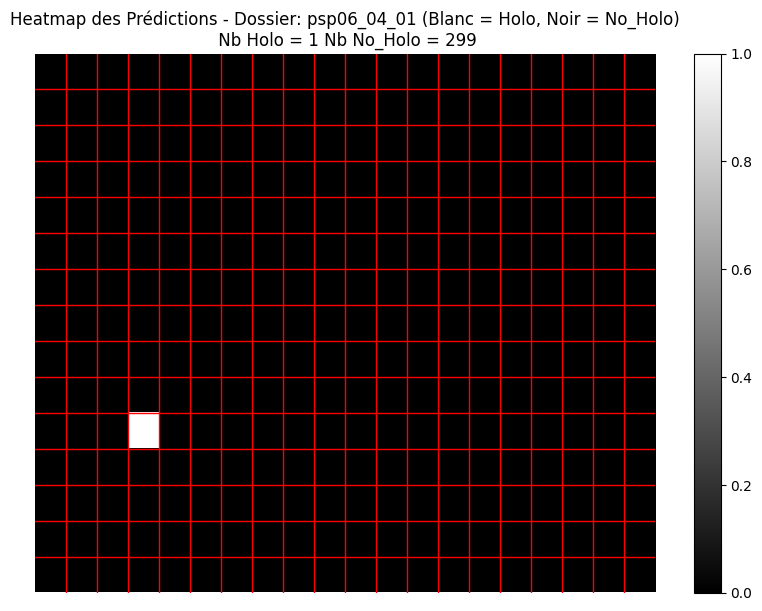

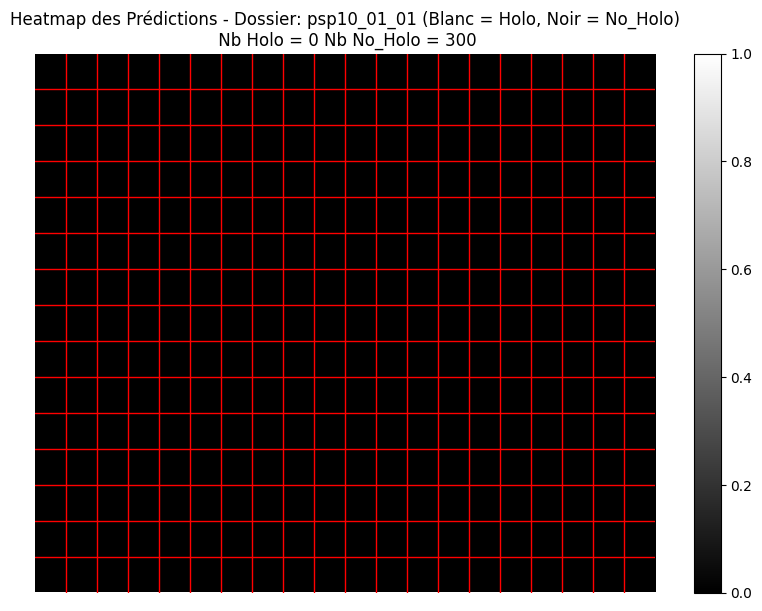

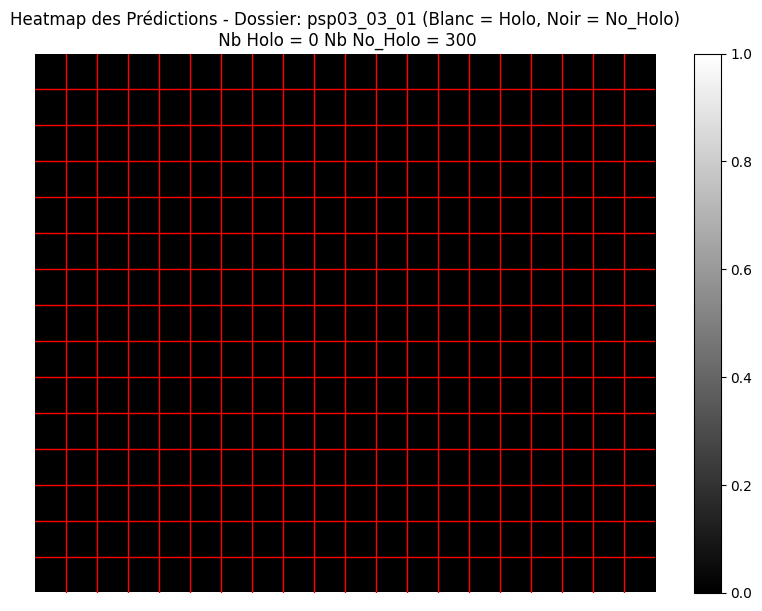

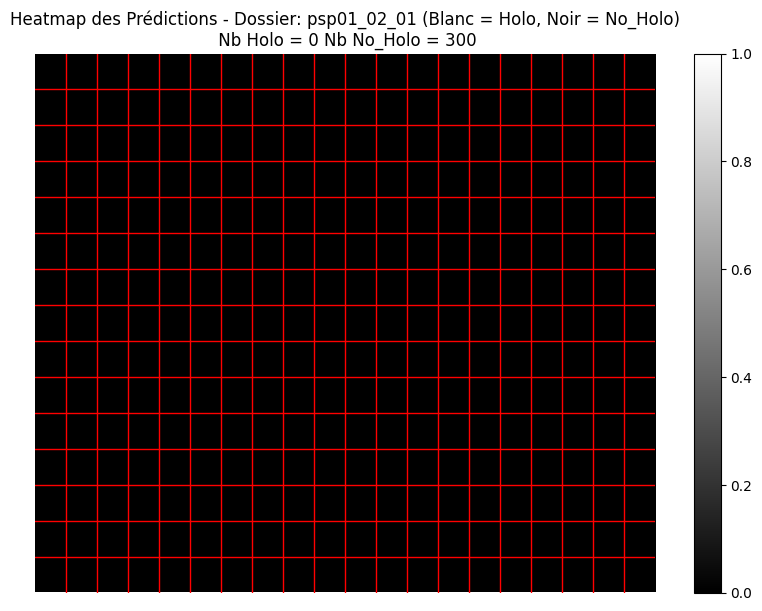

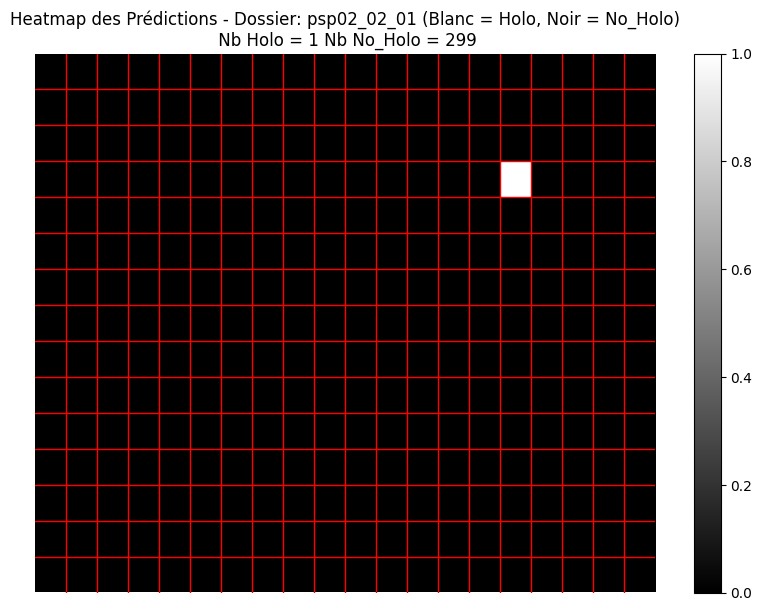

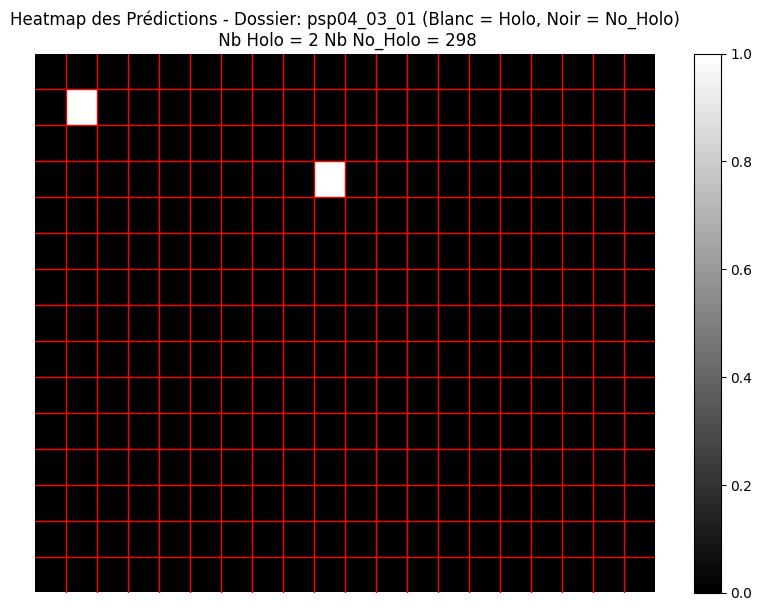

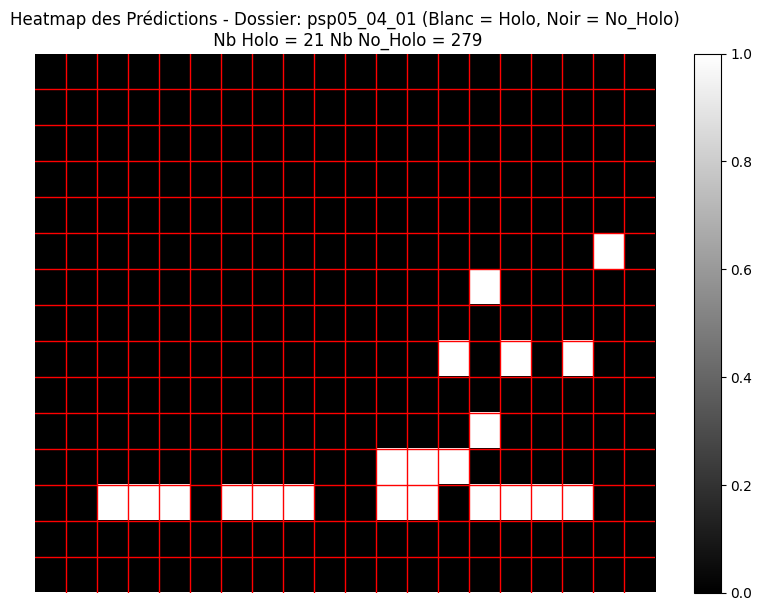

In [6]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_copy_without_holo):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [7]:
print(all_nb_holo_fraud)

[8, 0, 0, 1, 0, 0, 0, 1, 2, 21]


## Photo Holo Copy

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/test/photo_holo_copy'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_photo_holo_copy.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

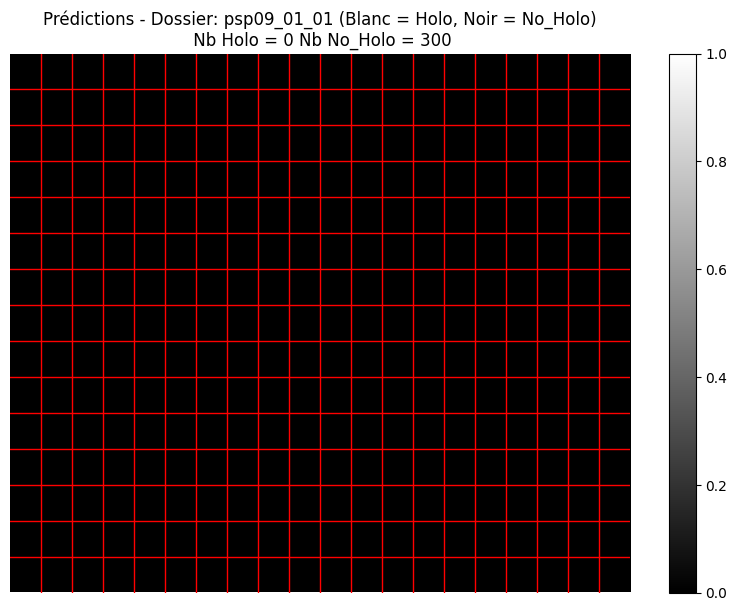

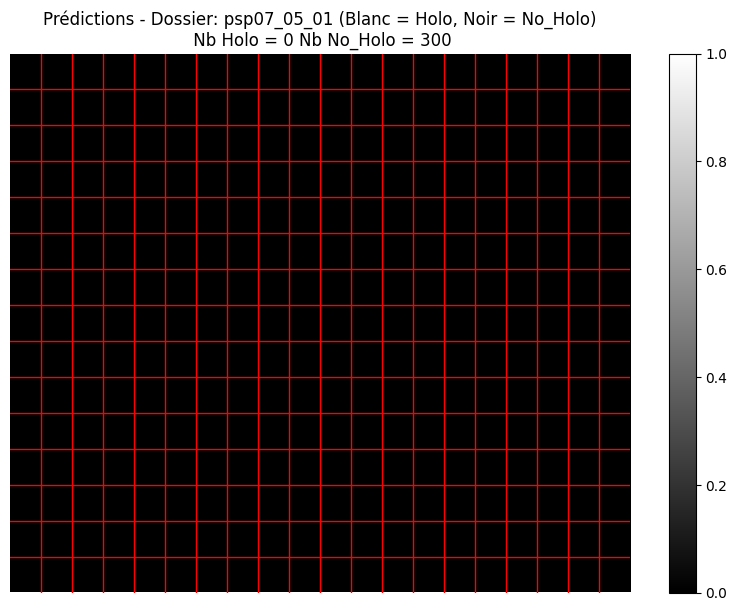

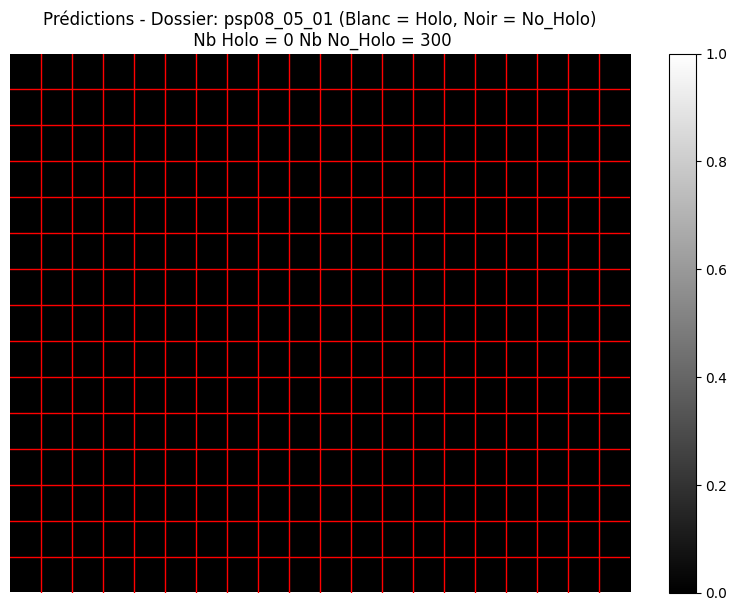

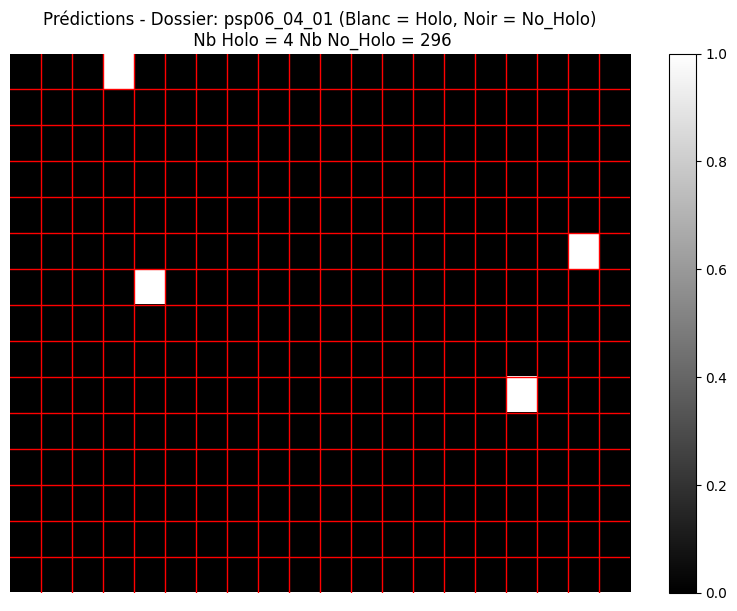

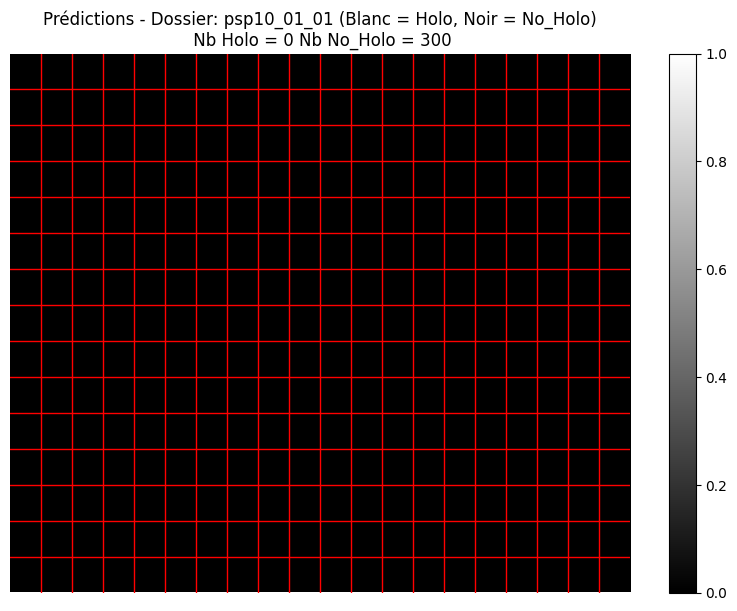

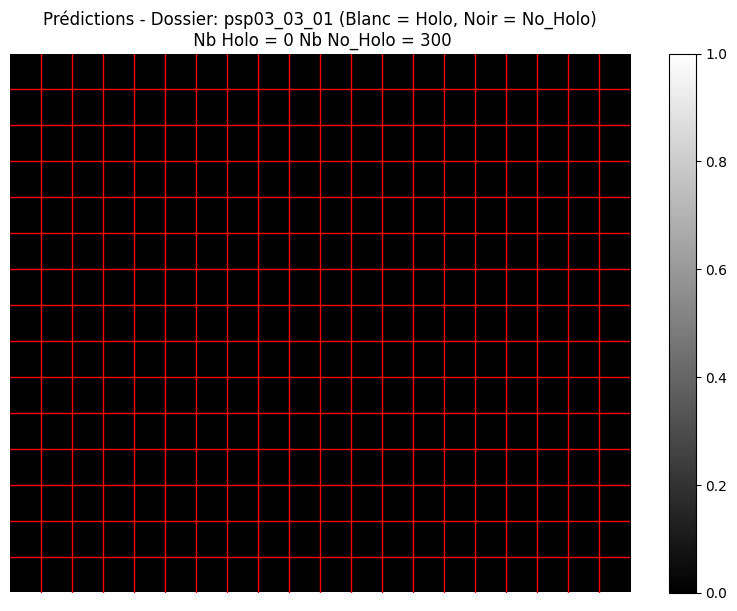

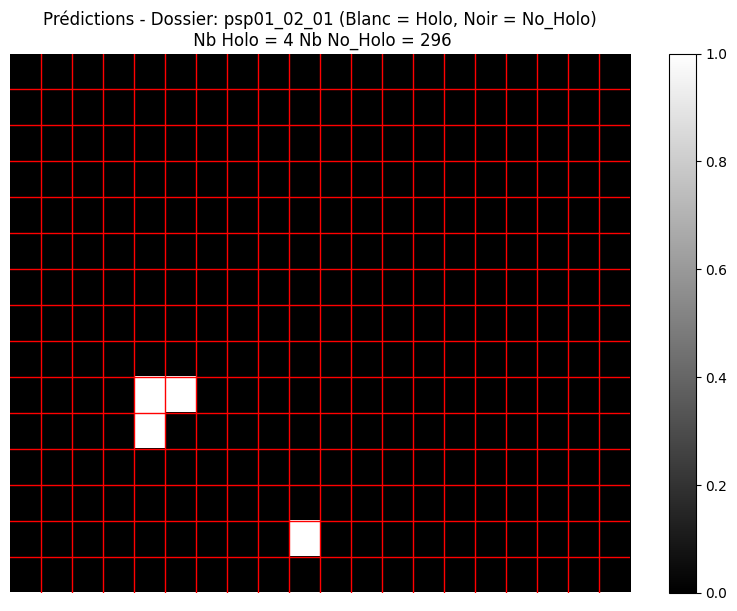

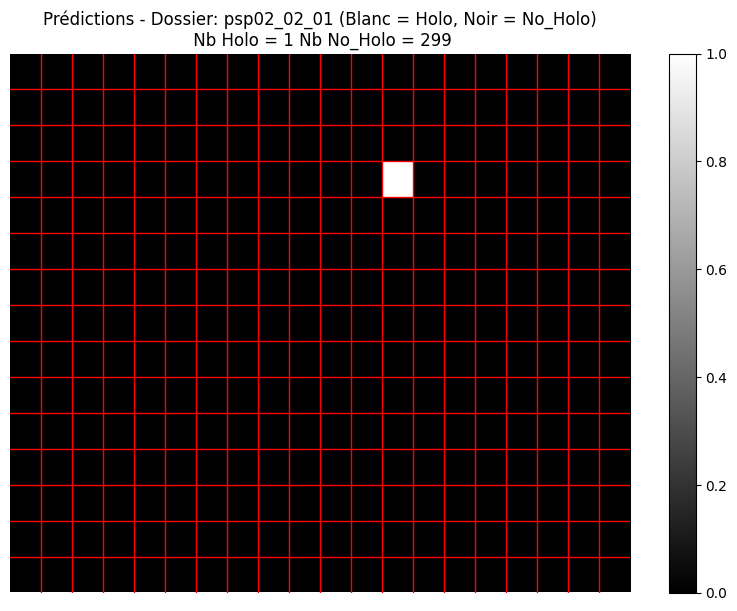

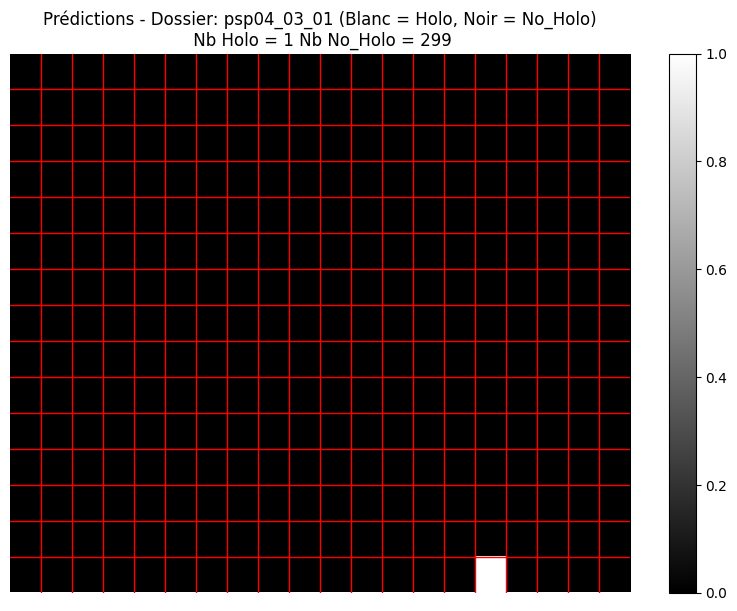

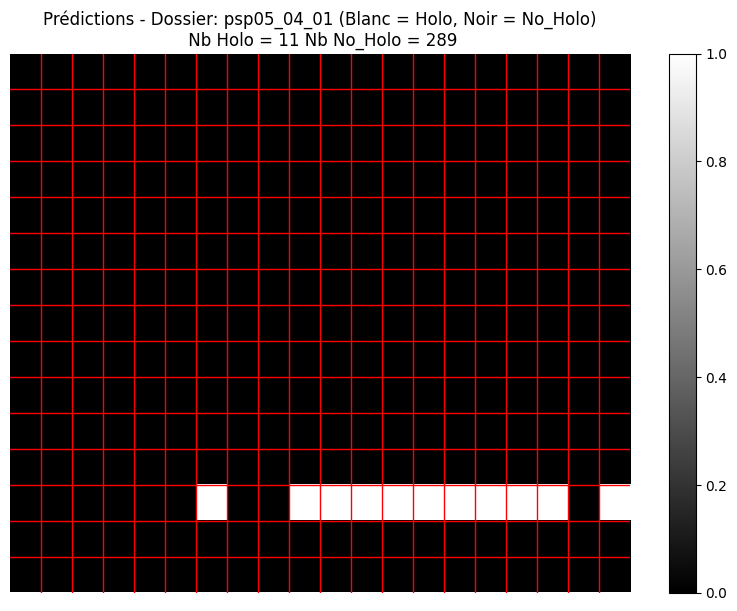

In [15]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_photo_holo_copy):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [10]:
print(all_nb_holo_fraud)

[8, 0, 0, 1, 0, 0, 0, 1, 2, 21, 0, 0, 0, 4, 0, 0, 4, 1, 1, 11]


##Pseudo Holo Copy

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/test/pseudo_holo_copy'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_pseudo_holo_copy.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

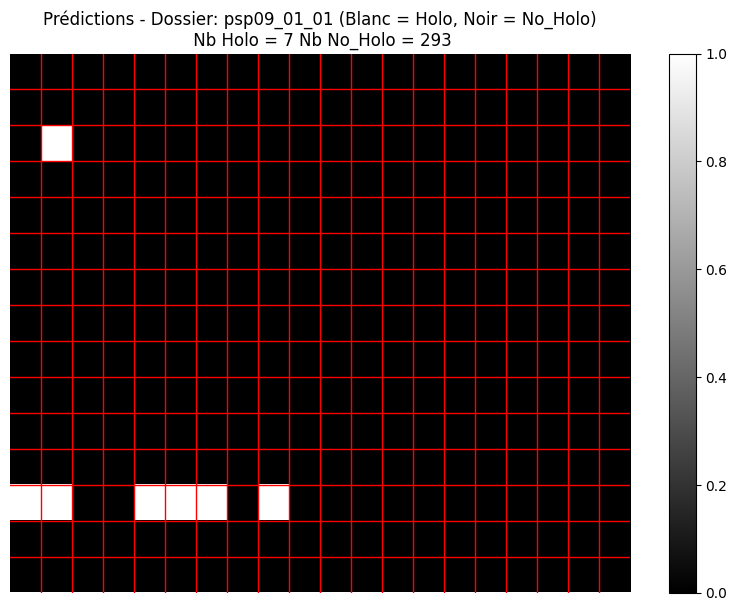

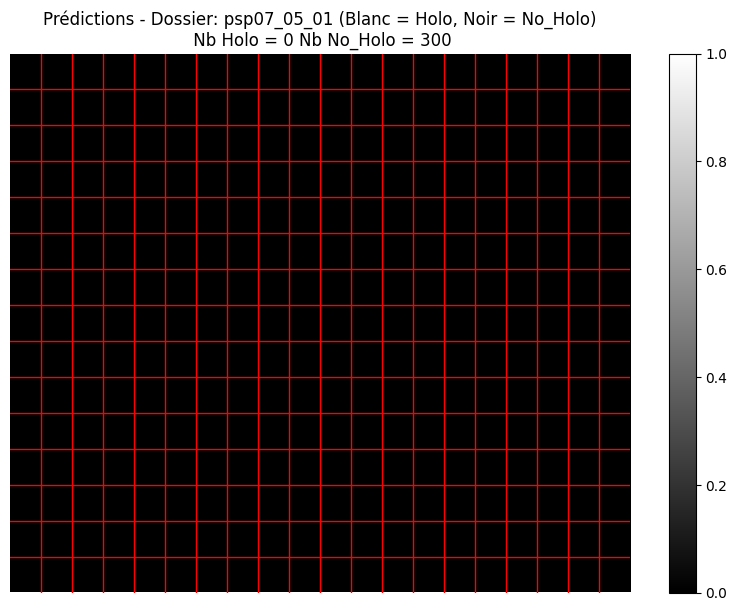

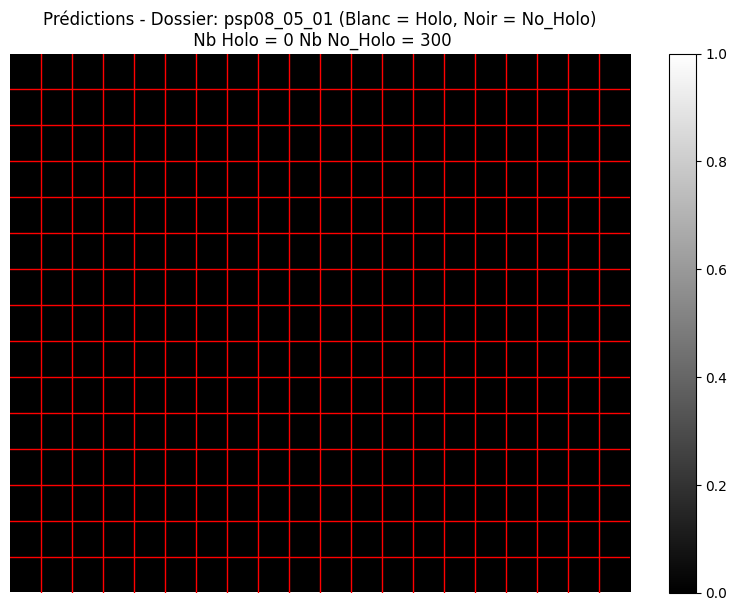

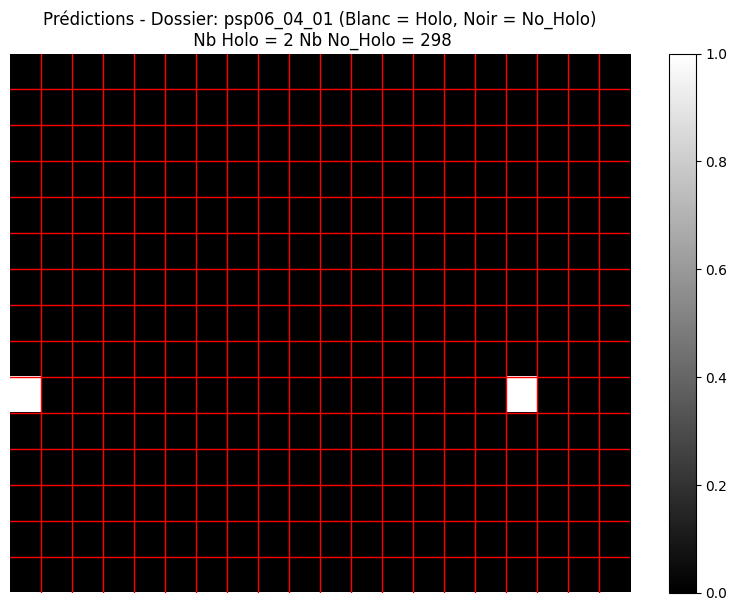

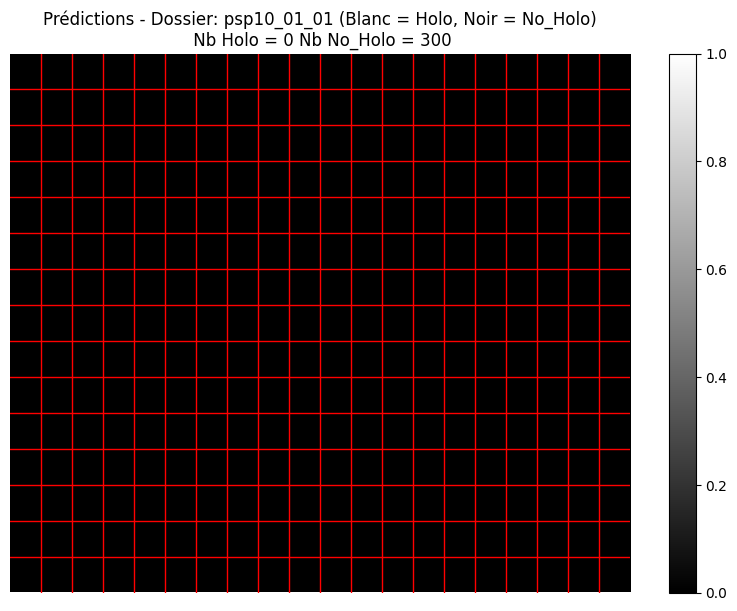

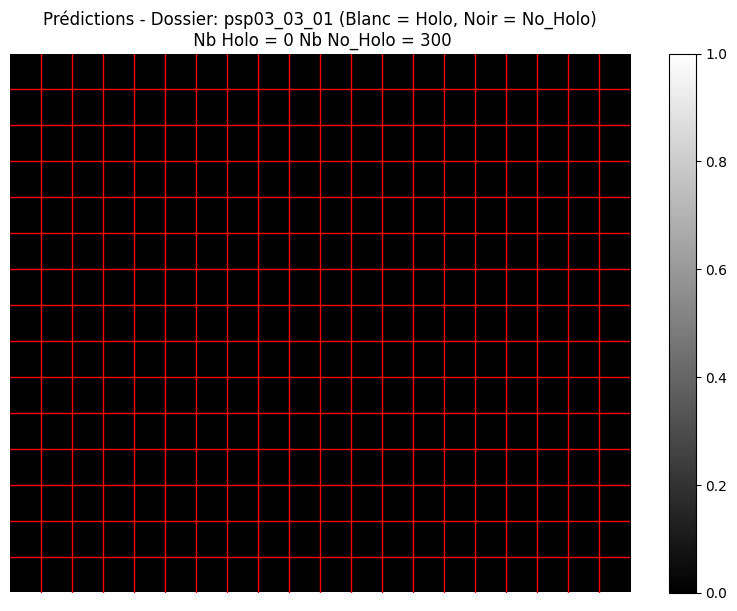

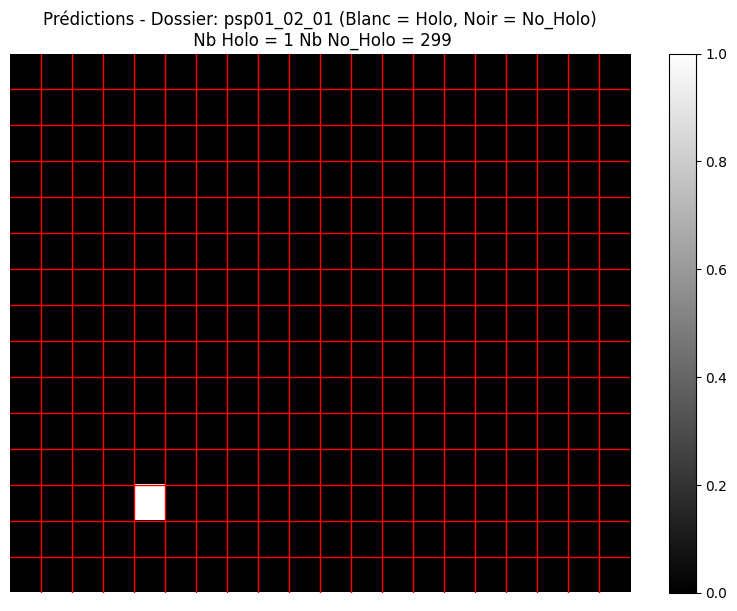

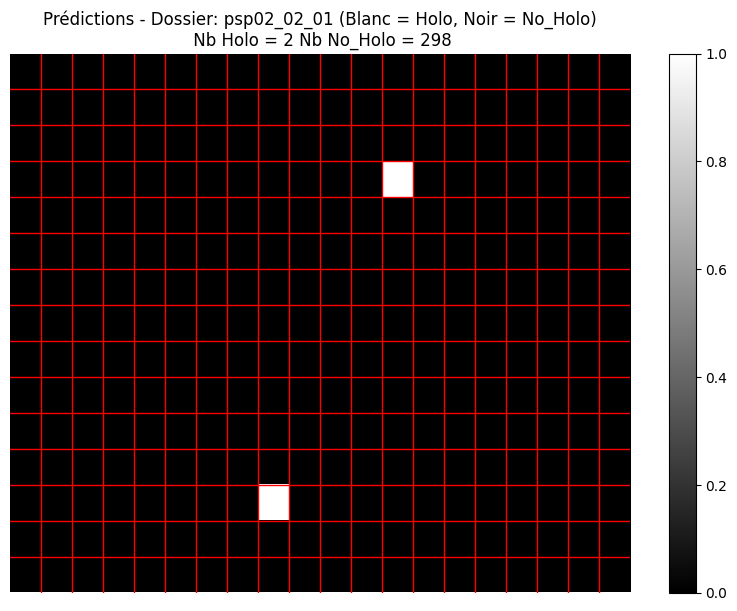

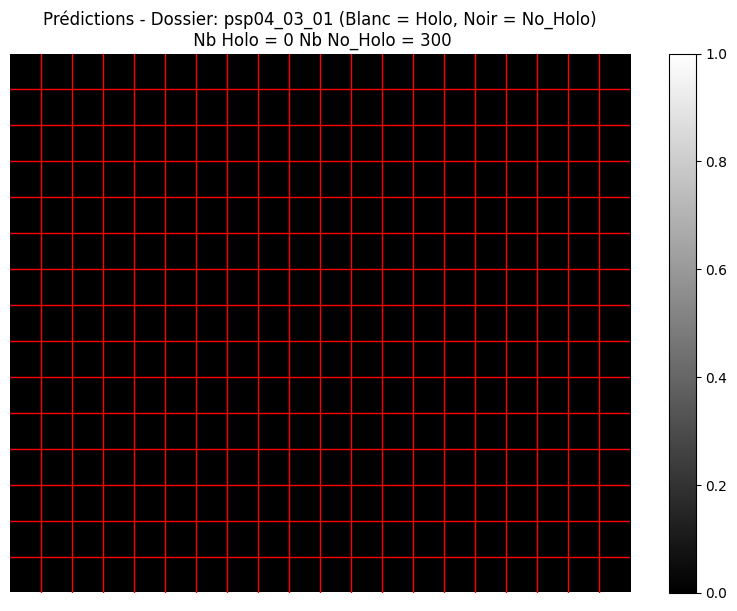

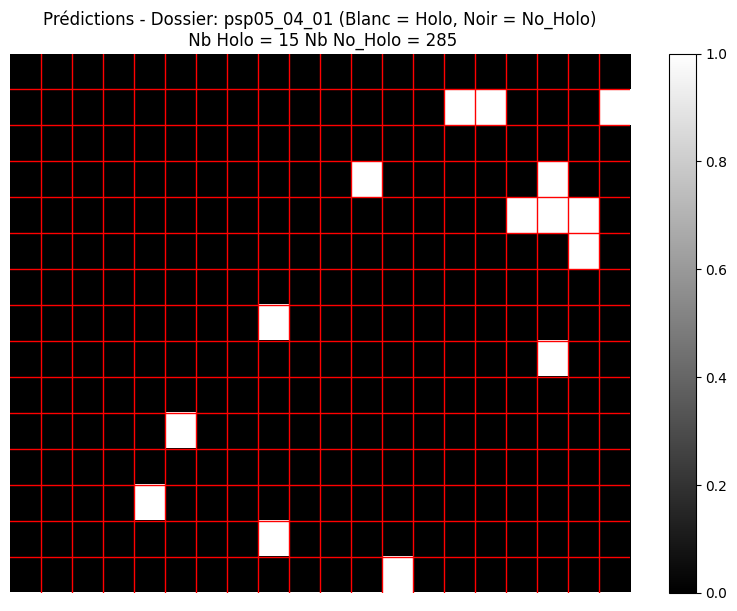

In [14]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_pseudo_holo_copy):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [13]:
print(all_nb_holo_fraud)

[8, 0, 0, 1, 0, 0, 0, 1, 2, 21, 0, 0, 0, 4, 0, 0, 4, 1, 1, 11, 7, 0, 0, 2, 0, 0, 1, 2, 0, 15]


## Photo Replacement

In [4]:
heatmaps_photo_replacement= []
all_nb_holo_fraud = []

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import re
import tensorflow as tf  # Assurez-vous d'importer tensorflow si ce n'est pas déjà fait

# Chemin du dossier contenant les fichiers ZIP
base_folder_path = '/content/test/photo_replacement'   # Chemin de base

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    img_array /= 255.0  # Normaliser l'image
    return img_array

# Fonction de tri personnalisé pour les fichiers
def sort_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# Charger votre modèle
model = tf.keras.models.load_model('/content/best_model.keras')

# Dossiers à traiter
folders_to_process = [f for f in os.listdir(base_folder_path) if os.path.isdir(os.path.join(base_folder_path, f))]

for folder in folders_to_process:
    # Répertoire contenant les images à prédire
    images_dir = os.path.join(base_folder_path, folder)

    # Charger et trier les chemins des images
    image_paths = [os.path.join(images_dir, img) for img in os.listdir(images_dir)]
    image_paths = sort_nicely(image_paths)

    # Initialiser un tableau pour stocker les prédictions
    predictions = []

    # Faire des prédictions pour chaque image
    for img_path in image_paths:
        img = load_and_preprocess_image(img_path)
        prediction = model.predict(img)
        predicted_class = 1 if prediction > 0.5 else 0  # 1 pour Holo, 0 pour No_Holo
        predictions.append(predicted_class)

    # Convertir les prédictions en tableau numpy
    predictions = np.array(predictions)

    # Compter le nombre de Holo et No_Holo
    nb_holo = np.sum(predictions == 1)  # Holo
    nb_no_holo = np.sum(predictions == 0)  # No_Holo
    all_nb_holo_fraud.append(nb_holo)
    # Reshape pour créer une matrice de 15x20 (15 lignes et 20 colonnes)
    heatmap_data = predictions.reshape((15, 20))

    # Stocker la heatmap dans la liste
    heatmaps_photo_replacement.append((heatmap_data, nb_holo, nb_no_holo))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

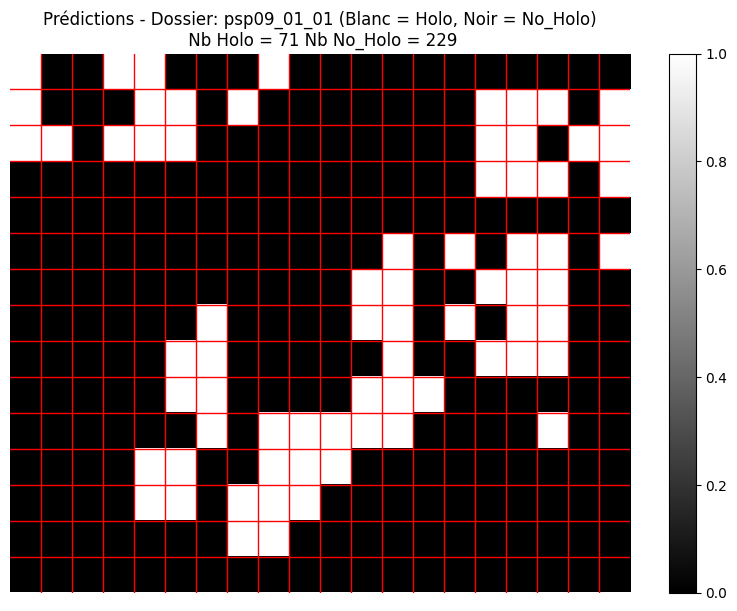

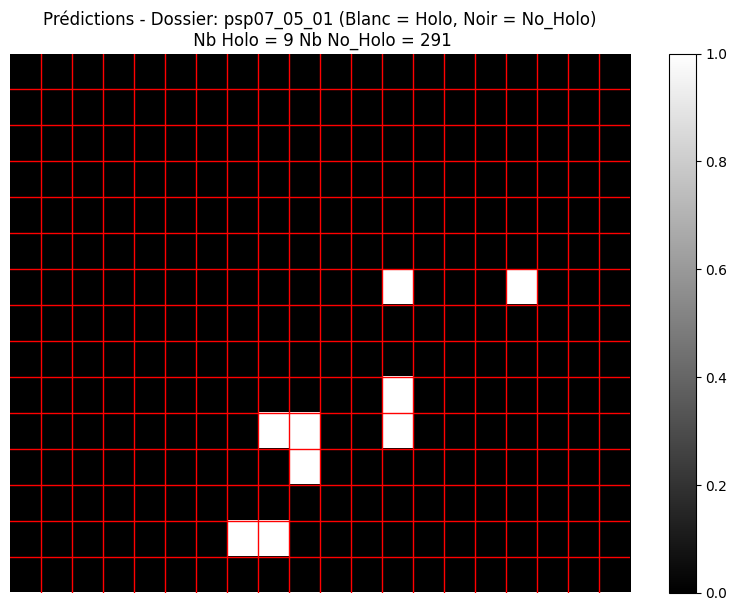

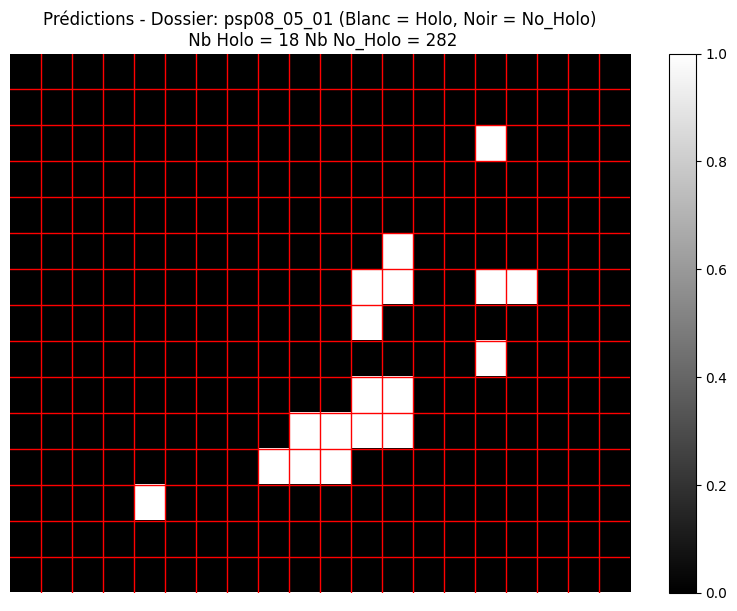

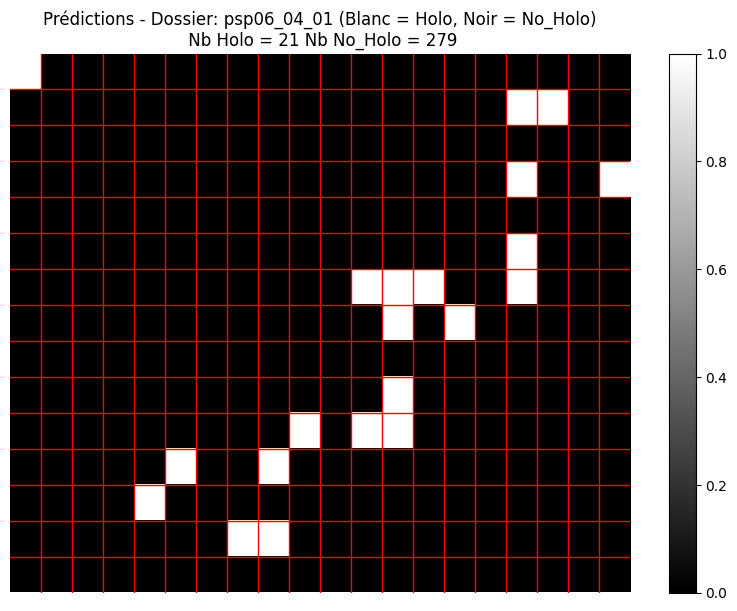

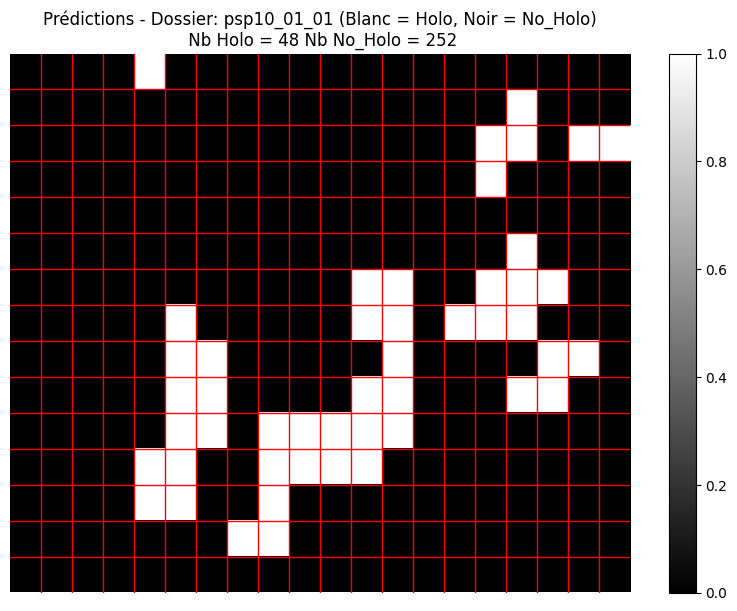

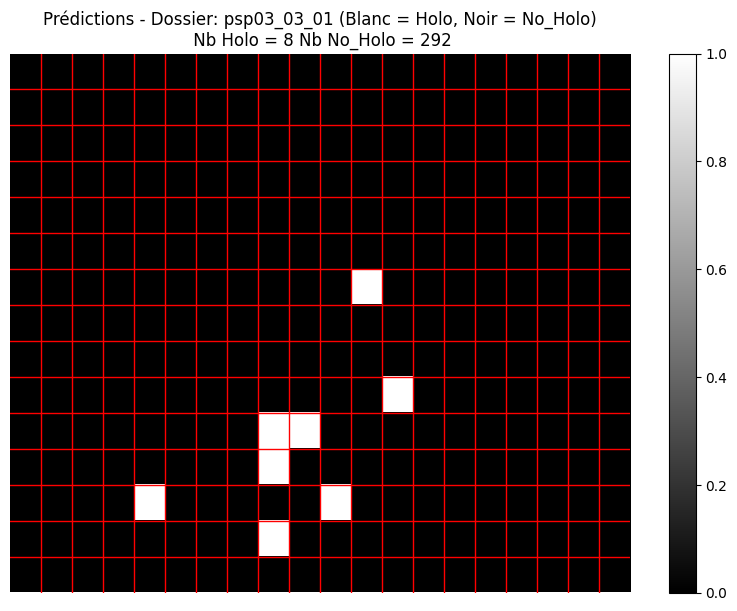

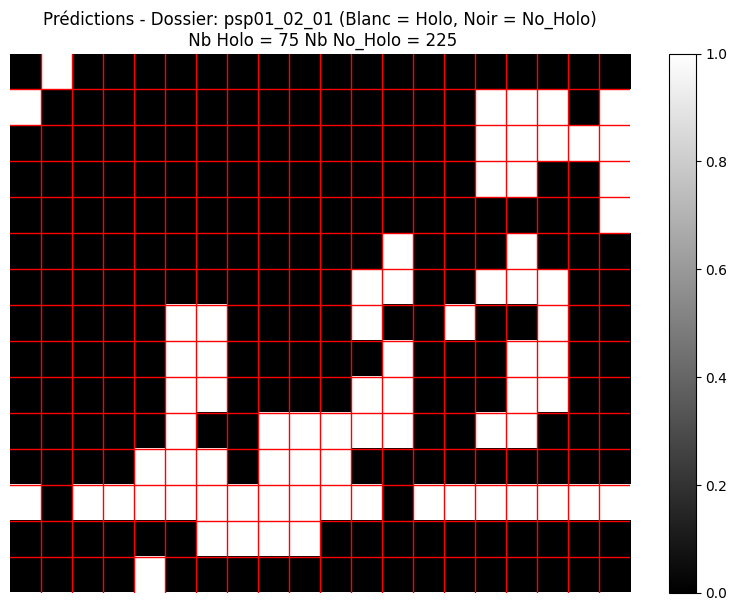

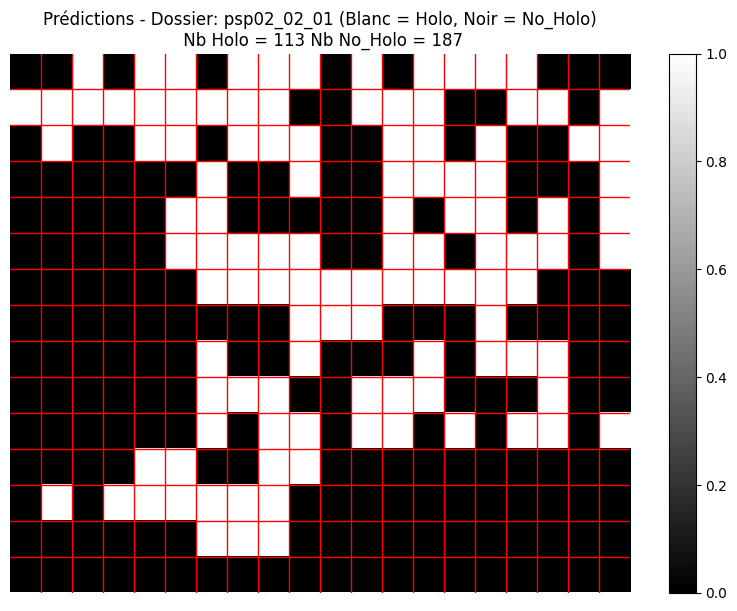

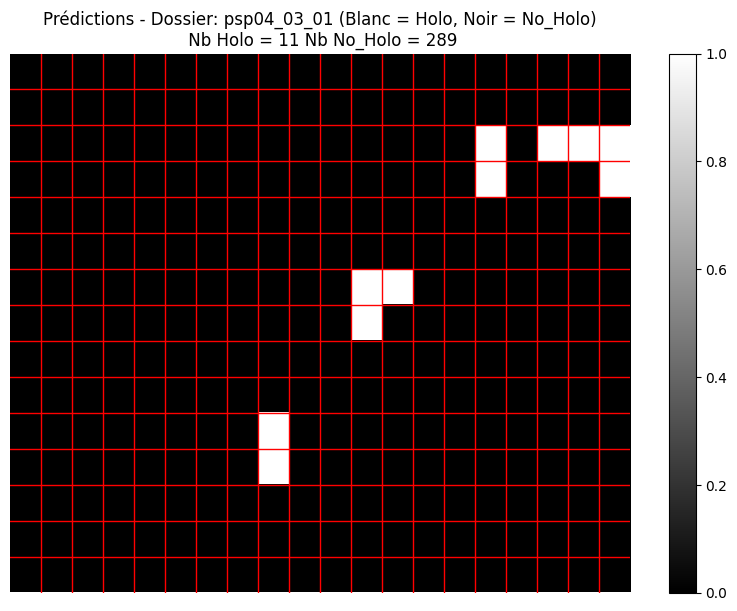

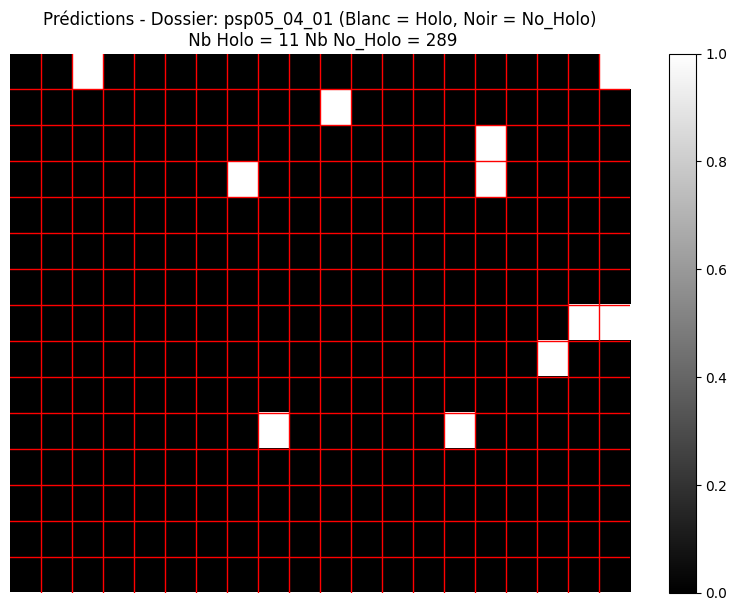

In [7]:
# Afficher toutes les heatmaps
for i, (heatmap_data, nb_holo, nb_no_holo) in enumerate(heatmaps_photo_replacement):
    plt.figure(figsize=(10, 7))  # Ajustez la taille de la figure si nécessaire
    plt.imshow(heatmap_data, cmap='binary_r', aspect='auto', vmin=0, vmax=1)

    # Ajouter des lignes rouges pour séparer les cases
    num_rows, num_cols = heatmap_data.shape
    for r in range(1, num_rows):
        plt.axhline(y=r - 0.5, color='red', linewidth=1)
    for c in range(1, num_cols):
        plt.axvline(x=c - 0.5, color='red', linewidth=1)

    plt.colorbar()
    plt.title(f'Prédictions - Dossier: {folders_to_process[i]} (Blanc = Holo, Noir = No_Holo)\n Nb Holo = {nb_holo} Nb No_Holo = {nb_no_holo}')
    plt.axis('off')
    plt.show()


In [8]:
print(all_nb_holo_fraud)

[71, 71, 9, 18, 21, 48, 8, 75, 113, 11, 11]
